# Exploratory Data Analysis of Video Game Data

In this notebook we will explore the data through visualization, fill any missing values and look into feature that we hypothesised may have corrilation with our game popularity as well as explore what we will define as a "popular" video game.

Below is a synopsis of what we learned in this notebook:

## Hours of Game play: between 16 and 50 hours
The merging of data sets Steam Purchase and Steam Play in part III, shows us that extermely long games have low sales, we determined this cut off was about 50 hours of game play.

In part V, we saw that longer games did have a higher percentage of positive reviews, we determined that games above 16 hours were at least 50% positive.

So we can conclude keeping the game play between 16 and 50 hours will be a safe area


## Popular Genres: Action, Role-Playing, Shooting, Racing, Sports, Platform, Survival, Horror, Simulation, Adventure
In part IV: We trimmed the data to look at only the most popular games by sales and then compared the User and critic scores to the sales with the hue set to Genre, Rating, and then Platform. 

Action - Both User and Critic Scores appear fairly high for these games. Action is a solid choice for Genre

Role-Playing - The User and Critic Scores appear to agree, though slightly lower sales than Action, still a solid option

Shooting - It looks as if Critics like this genre more than users, sales are slightly higher than RP games, but lower than the potential of the Action games

Racing - User and Critics seem to agree on the scores, they are less popular than Action (as far as scores), but have a higher potential for sales. We could hypothesise that this is because Racing games tend to have more co-op options, thus the need for players to have friends who play the game so they can play together.

Sports - Just like Shooting, Critics like these games more than users, and a suprisingly high sales similar to Racing. Do these games tend to have co-op options? 

Platform - There doesn't seem to be many of these in the popular games, however those that are here are scored high and have a decent number of sales. This sounds like a High Risk/High Reward genre.

In part V-ii, we had more genre's to look at, that became more niche. This data set gave us: survival,rpg, action, horror, platform, simulation, and adventure. It is good to see these two data sets agree on popular game genres

## Popular Platform: Current or up-to-date Systems
It doesn't appear as if the critics have a prefrence in Platform, where as it looks like the Useres like the PSP, PS2, and 3DS and appear to dislike the XBox 360 and PS3.


## Rating: Everyone, Teen, Mature
Looking at the Ratings, it appears that making a game with a rating of Everyone or Teen is mroe popular amongs Users and Critics, with Everyone having a higher sales potentions, likely because the rating allows them to reach a younger audience.

It appears that having a Mature rating has higher sales than Teen ratings, however it has the risk of lower user and critic scores.

## Animation: 3D
This category was compareding the large data set in part V-i. We compared 2D, 2.5D, and 3D. 3D tended to have higher ratings as well as higher price for the game.

## Art Style: Visual Novel, Anime, and Pixel Graphics
These 3 art styles were the top performing in the data set in part V

## Game Features: Great Soundtrack, Story Rich, Multiplayer
There were many features we looked at in part V, games that had one of these 3 tags tended to have a higher rate positive ratings, as well as be important for longer games.

## Play Style: Strategy, Open World, Survival
These again were found in part V. These 3 were favored for the game play times we were looking at as well as having high ratings.

## Difficulty: Difficult
In part V, ratings were higher for games that were considered Difficult and they experienced longer game play time.

## Point of View: First or Third
We saw in part V that First and Third person perspectives were favored for longer games

## Setting: Fantasy, Cyber Punk, World War 2, Post Apocalyptic, Warhammer 40k, and War
These settings were favored for longer gameplay and higher ratings in the data set looked at in part V.

In [1]:
import pandas as pd
from pathlib import Path
import seaborn as sns


import requests
import numpy as np
#import pandas_profiling
#import tkinter
import matplotlib
import matplotlib.pyplot as plt
#matplotlib.use('tkagg')

# I. Steam Purchase Data

Note: Hours column is all 1's, we're going to use this df to see game popularity by number of steam purchases, and later check if this matches up with data from other data sets.

In [2]:
purchase = pd.read_csv("C:/Users/book_/OneDrive/Documents/GitHub/Capstone2-Video-Game-Popularity/csv_files/steam_data_purchase_clean.csv", index_col=0)

In [3]:
purchase.head()

,UserID,Game,Purchase/Play,Hours
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0
2,151603712,Fallout 4,purchase,1.0
4,151603712,Spore,purchase,1.0
6,151603712,Fallout New Vegas,purchase,1.0
8,151603712,Left 4 Dead 2,purchase,1.0


In [4]:
purchase.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129511 entries, 0 to 199998
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   UserID         129511 non-null  int64  
 1   Game           129511 non-null  object 
 2   Purchase/Play  129511 non-null  object 
 3   Hours          129511 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.9+ MB


In [5]:
purchase.describe()

,UserID,Hours
count,1.295110e+05,129511.0
mean,1.024447e+08,1.0
std,7.236442e+07,0.0
min,5.250000e+03,1.0
25%,4.550738e+07,1.0
50%,8.605570e+07,1.0
75%,1.542307e+08,1.0
max,3.099031e+08,1.0


In [6]:
purchase['Game'].value_counts()

Dota 2                                                                      4841
Team Fortress 2                                                             2323
Unturned                                                                    1563
Counter-Strike Global Offensive                                             1412
Half-Life 2 Lost Coast                                                       981
                                                                            ... 
Pinball FX2 - Marvel's Ant-Man                                                 1
Voyage Journey to the Moon                                                     1
Toast Time                                                                     1
Tom Clancy's Ghost Recon Phantoms - NA Substance with Style pack (Recon)       1
Robot Rescue Revolution                                                        1
Name: Game, Length: 5155, dtype: int64

In [7]:
purchase['Game'].value_counts().describe()

count    5155.000000
mean       25.123375
std       101.572586
min         1.000000
25%         2.000000
50%         5.000000
75%        18.000000
max      4841.000000
Name: Game, dtype: float64

In [8]:
len(pd.unique(purchase['Game']))

5155

There are 5155 different games listed in this data set with a mean 25 sales and a standard deviation of 102 sales. 

Next I want to look at the distribution of these sales, to see what we can decide on as a good base line for determining if a game is popular or not.

In [9]:

pivoted_purchase = purchase.pivot_table(index='Game', values='Hours', aggfunc='count')
pivoted_purchase

,Hours
Game,
007 Legends,1
0RBITALIS,3
1... 2... 3... KICK IT! (Drop That Beat Like an Ugly Baby),7
10 Second Ninja,6
"10,000,000",1
...,...
sZone-Online,102
samurai_jazz,1
the static speaks my name,13


In [10]:
pivoted_purchase.describe()

,Hours
count,5155.000000
mean,25.123375
std,101.572586
min,1.000000
25%,2.000000
50%,5.000000
75%,18.000000
max,4841.000000


Above confirmed that the pivot that was just done does still give us the same numbers as what we were seeing in the dataframe.

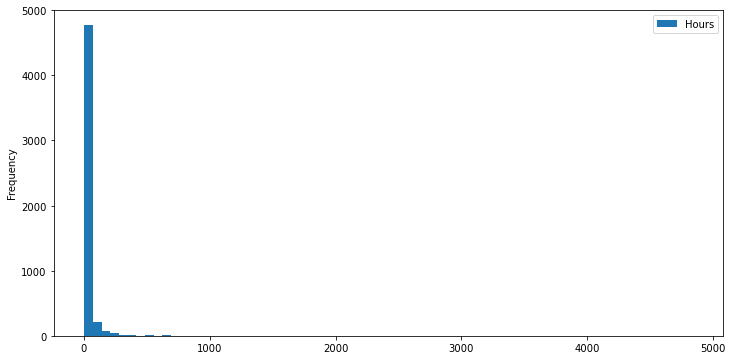

In [11]:
%matplotlib inline
pivoted_purchase.plot(kind='hist', bins=70, figsize=[12,6])
plt.show()

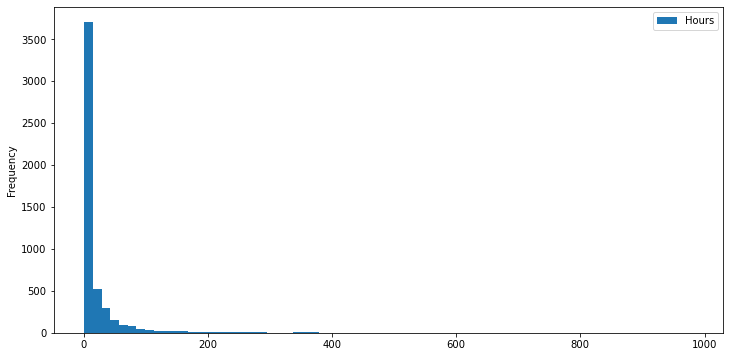

In [12]:
pivoted_purchase[pivoted_purchase['Hours'] < 1000].plot(kind='hist', bins=70, figsize=[12,6])
plt.show()

In [13]:
pivoted_purchase[pivoted_purchase['Hours'] < 400].describe()

,Hours
count,5126.000000
mean,20.102419
std,43.504239
min,1.000000
25%,2.000000
50%,5.000000
75%,17.000000
max,395.000000


Our data appears to be very skewed on sales. I don't believe this data set will be a good determinate for popularity as the analysis suggests that our game could be popular if we reach 17 sales.

# II. Steam Play Data

In this data set we intend to look at the hours each game has been played to see if that would be a better determinate for game popularity

In [14]:
play = pd.read_csv("C:/Users/book_/OneDrive/Documents/GitHub/Capstone2-Video-Game-Popularity/csv_files/steam_data_play_clean.csv", index_col=0)
play.head()

,UserID,Game,Purchase/Play,Hours
1,151603712,The Elder Scrolls V Skyrim,play,273.0
3,151603712,Fallout 4,play,87.0
5,151603712,Spore,play,14.9
7,151603712,Fallout New Vegas,play,12.1
9,151603712,Left 4 Dead 2,play,8.9


In [15]:
play.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70489 entries, 1 to 199999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   UserID         70489 non-null  int64  
 1   Game           70489 non-null  object 
 2   Purchase/Play  70489 non-null  object 
 3   Hours          70489 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.7+ MB


In [16]:
play.describe()

,UserID,Hours
count,7.048900e+04,70489.000000
mean,1.058812e+08,48.878063
std,7.150365e+07,229.335236
min,5.250000e+03,0.100000
25%,4.934256e+07,1.000000
50%,9.169067e+07,4.500000
75%,1.556738e+08,19.100000
max,3.099031e+08,11754.000000


In [17]:
play['Game'].value_counts()

Dota 2                             4841
Team Fortress 2                    2323
Counter-Strike Global Offensive    1377
Unturned                           1069
Left 4 Dead 2                       801
                                   ... 
Theatre of War 2 Africa 1943          1
Watchmen The End Is Nigh              1
R.O.O.T.S                             1
Starseed Pilgrim                      1
Shattered Planet                      1
Name: Game, Length: 3600, dtype: int64

In the first application of .describe() we are analyzing each instance of hours playing a game seperately. We can see that this will be fairly skewed just by seeing the mean as 48.9 hours versus the median of 4.5 hours. Next I would like to see if this remains true if we take the average hours played grouped by the game name

In [18]:
play.drop(columns='UserID', inplace=True)
avg_hr_play = play.groupby('Game').mean()
avg_hr_play.head()

,Hours
Game,
007 Legends,0.70
0RBITALIS,0.40
1... 2... 3... KICK IT! (Drop That Beat Like an Ugly Baby),4.00
10 Second Ninja,2.95
"10,000,000",3.60


In [19]:
avg_hr_play.describe()

,Hours
count,3600.000000
mean,13.331637
std,39.121551
min,0.100000
25%,1.493651
50%,3.900000
75%,10.758667
max,1295.000000


<AxesSubplot:ylabel='Frequency'>

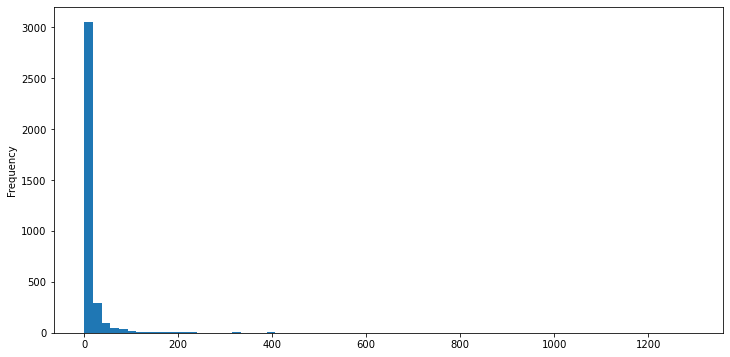

In [20]:
avg_hr_play['Hours'].plot(kind='hist', bins=70, figsize=[12,6])

In [21]:
trim_avg_hr_play = avg_hr_play[avg_hr_play['Hours']<250]

{'whiskers': [<matplotlib.lines.Line2D at 0x240840f09a0>,
 'caps': [<matplotlib.lines.Line2D at 0x240840fd0a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x240840f0640>],
 'medians': [<matplotlib.lines.Line2D at 0x240840fd760>],
 'fliers': [<matplotlib.lines.Line2D at 0x240840fdac0>],
 'means': []}

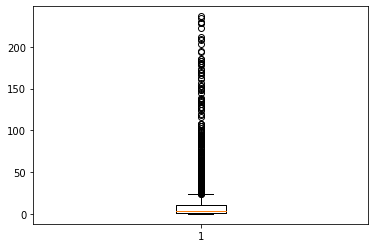

In [22]:
plt.boxplot(trim_avg_hr_play['Hours'])

<AxesSubplot:ylabel='Frequency'>

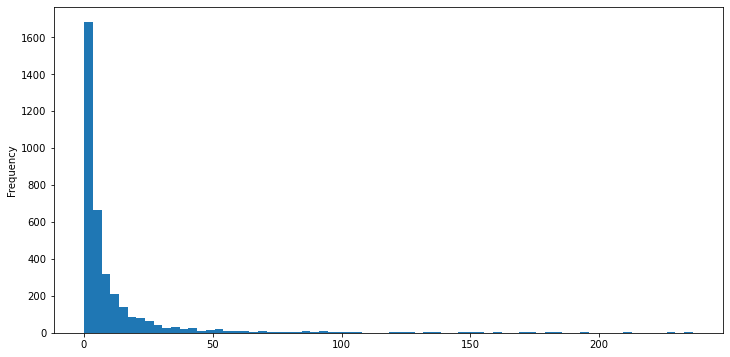

In [23]:
trim_avg_hr_play['Hours'].plot(kind='hist', bins=70, figsize=[12,6])

In [24]:
trim_avg_hr_play.describe()

,Hours
count,3584.000000
mean,11.570922
std,24.323364
min,0.100000
25%,1.455357
50%,3.890000
75%,10.600000
max,236.375176


Looking at these two sets (purchase and play) it's difficult to place a point to determine a video game as "popular", with sales we said we could determine 17 sales the video game was popular since it was more popular than 75% of data, similarly using the 75% cut off, we could say a game is popular with only 10 hours of game play. The 10 Hours isn't as strange as the 17 sales. I am curious to look at the corrilations of these. In theory we should have all the same video games in these two data sets since we seperated them from the same set previously, we have just aggragated the data.

## III. Merging Purchase and Play Data

We plan to merge these two data sets back together to see if there is a corrilation between the sales and the hours of play.

In [25]:
merge_purchase_play = pivoted_purchase.merge(avg_hr_play, how='inner', on='Game')
merge_purchase_play.head()

,Hours_x,Hours_y
Game,,
007 Legends,1,0.70
0RBITALIS,3,0.40
1... 2... 3... KICK IT! (Drop That Beat Like an Ugly Baby),7,4.00
10 Second Ninja,6,2.95
"10,000,000",1,3.60


In [26]:
merge_purchase_play.rename(columns={"Hours_x": "Purchase", "Hours_y": "Hours"}, inplace=True)

In [27]:
merge_purchase_play.corr()

,Purchase,Hours
Purchase,1.000000,0.156211
Hours,0.156211,1.000000


<AxesSubplot:xlabel='Hours', ylabel='Purchase'>

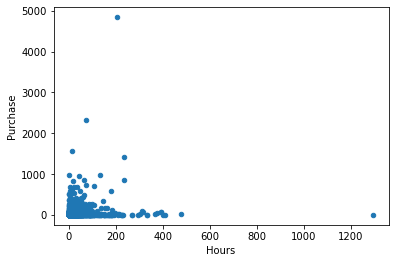

In [28]:
merge_purchase_play.plot.scatter(x='Hours', y='Purchase')

In [29]:
trim_merged = merge_purchase_play[merge_purchase_play['Hours']<500]

trim_merged = trim_merged[trim_merged['Purchase']<1000]

trim_merged.head()

,Purchase,Hours
Game,,
007 Legends,1,0.70
0RBITALIS,3,0.40
1... 2... 3... KICK IT! (Drop That Beat Like an Ugly Baby),7,4.00
10 Second Ninja,6,2.95
"10,000,000",1,3.60


<AxesSubplot:xlabel='Hours', ylabel='Purchase'>

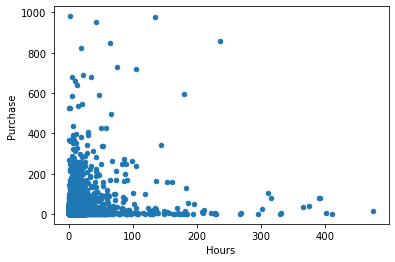

In [30]:
trim_merged.plot.scatter(x='Hours', y='Purchase')

In [31]:
trim_merged.corr()

,Purchase,Hours
Purchase,1.000000,0.154892
Hours,0.154892,1.000000


<AxesSubplot:xlabel='Hours', ylabel='Purchase'>

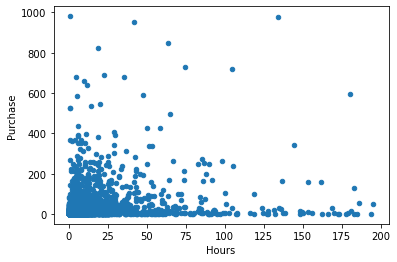

In [32]:
trim_merged[trim_merged['Hours']<200].plot.scatter(x='Hours', y='Purchase')

<AxesSubplot:xlabel='Hours', ylabel='Purchase'>

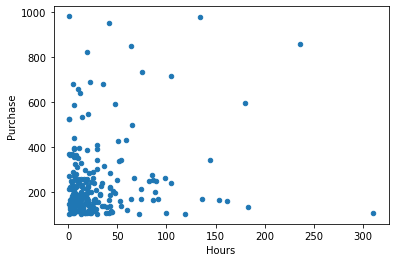

In [33]:
trim_merged[trim_merged['Purchase']>100].plot.scatter(x='Hours', y='Purchase')

Looking at the scatter plot we can conclude that shorter games tend to be more popular, about 50 hours appears to be when the bulk of the games tend to start lowering in sales.

##  IV. Video Game Data 2019 Sales

In [34]:
vg_sales_2019 = pd.read_csv(r"C:/Users/book_/OneDrive/Documents/GitHub/Capstone2-Video-Game-Popularity/csv_files/vg_2019_w_scores_clean.csv", index_col=0)
vg_sales_2019.head()

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Vgchartzscore
0,1,Wii Sports,Sports,E,Wii,Nintendo,Nintendo EAD,7.7,NaN,82.86,NaN,NaN,NaN,NaN,NaN,2006.0,NaN
1,2,Super Mario Bros.,Platform,E,NES,Nintendo,Nintendo EAD,10.0,NaN,40.24,NaN,NaN,NaN,NaN,NaN,1985.0,NaN
2,3,Mario Kart Wii,Racing,E,Wii,Nintendo,Nintendo EAD,8.2,9.1,37.14,NaN,NaN,NaN,NaN,NaN,2008.0,8.7
3,4,PlayerUnknown's Battlegrounds,Shooter,E,PC,Other,Other,NaN,NaN,36.60,NaN,NaN,NaN,NaN,NaN,2017.0,NaN
4,5,Wii Sports Resort,Sports,E,Wii,Nintendo,Nintendo EAD,8.0,8.8,33.09,NaN,NaN,NaN,NaN,NaN,2009.0,8.8


In [35]:
vg_sales_2019.isna().sum()

Rank                 0
Name                 0
Genre                0
ESRB_Rating          0
Platform             0
Publisher            0
Developer            0
Critic_Score     49256
User_Score       55457
Total_Shipped    53965
Global_Sales     36377
NA_Sales         42828
PAL_Sales        42603
JP_Sales         48749
Other_Sales      40270
Year               979
Vgchartzscore    54993
dtype: int64

In [36]:
vg_sales_2019.shape

(55792, 17)

The rows missing the Year_of_Release appears to be about 1.7% of our data. For the sake of this project, we will drop this row as well.

In [37]:
vg_sales_2019.dropna(subset= ['Year'], inplace=True)
vg_sales_2019.isna().sum()

Rank                 0
Name                 0
Genre                0
ESRB_Rating          0
Platform             0
Publisher            0
Developer            0
Critic_Score     48281
User_Score       54485
Total_Shipped    52986
Global_Sales     35436
NA_Sales         41855
PAL_Sales        41648
JP_Sales         47778
Other_Sales      39317
Year                 0
Vgchartzscore    54057
dtype: int64

Now most our data is missing the Scores, Shipped, and Sales, however looking at the difference, the data we do have is about the same as the data we have in the 2016 data set. I want to see if seperating out these by one of the columns will catch all of the missing values, if so we make look at the scores with out this set. However first I want to analyze the data ignoring the columns with missing values.

In [38]:
sales_no_scores = vg_sales_2019.drop(columns=['Critic_Score', 'User_Score'], inplace=False)
sales_no_scores.columns

Index(['Rank', 'Name', 'Genre', 'ESRB_Rating', 'Platform', 'Publisher',
       'Developer', 'Total_Shipped', 'Global_Sales', 'NA_Sales', 'PAL_Sales',
       'JP_Sales', 'Other_Sales', 'Year', 'Vgchartzscore'],
      dtype='object')

In [39]:
vg_sales_2019.columns

Index(['Rank', 'Name', 'Genre', 'ESRB_Rating', 'Platform', 'Publisher',
       'Developer', 'Critic_Score', 'User_Score', 'Total_Shipped',
       'Global_Sales', 'NA_Sales', 'PAL_Sales', 'JP_Sales', 'Other_Sales',
       'Year', 'Vgchartzscore'],
      dtype='object')

In [40]:
sales_no_scores.corr()

,Rank,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Vgchartzscore
Rank,1.000000,-0.441132,-0.554746,-0.551018,-0.438917,-0.442877,-0.427856,-0.097345,-0.244891
Total_Shipped,-0.441132,1.000000,NaN,NaN,NaN,NaN,NaN,-0.169701,0.022811
Global_Sales,-0.554746,NaN,1.000000,0.914953,0.904559,0.228580,0.856771,-0.041354,0.359925
NA_Sales,-0.551018,NaN,0.914953,1.000000,0.683959,0.075239,0.687810,-0.059352,0.363698
PAL_Sales,-0.438917,NaN,0.904559,0.683959,1.000000,0.123954,0.814029,0.082548,0.294950
JP_Sales,-0.442877,NaN,0.228580,0.075239,0.123954,1.000000,0.082199,-0.351626,0.157500
Other_Sales,-0.427856,NaN,0.856771,0.687810,0.814029,0.082199,1.000000,0.089282,0.335126
Year,-0.097345,-0.169701,-0.041354,-0.059352,0.082548,-0.351626,0.089282,1.000000,-0.327895
Vgchartzscore,-0.244891,0.022811,0.359925,0.363698,0.294950,0.157500,0.335126,-0.327895,1.000000


The Year_of_Release does not appear to corrilate with sales. I attempted get_dummies, but there appears to be too many categories to do all of the columns at once, so I will be doing them seperately.

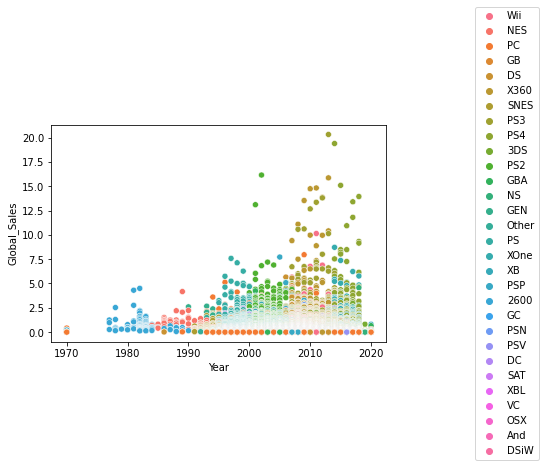

In [41]:
_ = sns.scatterplot(data=sales_no_scores, x='Year', y='Global_Sales', hue='Platform')
_.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

In [42]:
dummy_sales_platform = pd.get_dummies(sales_no_scores, columns=['Platform'])
dummy_sales_platform.shape

(54813, 44)

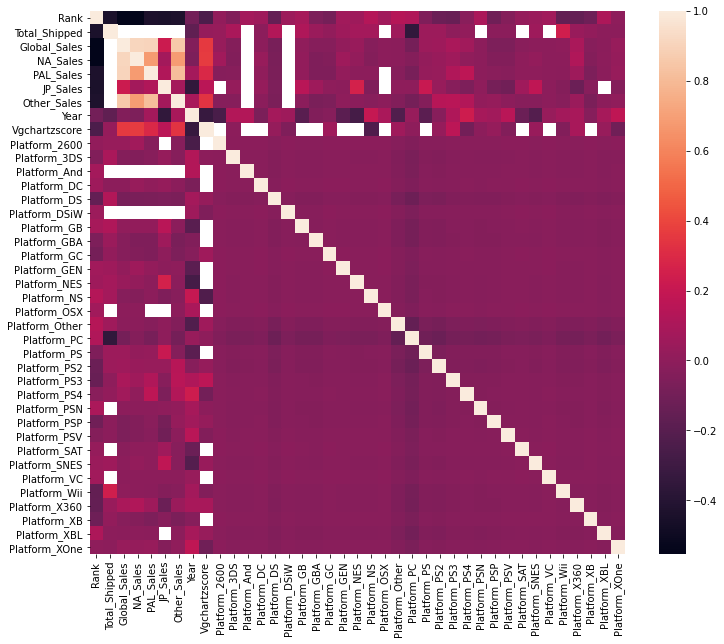

In [43]:
plt.subplots(figsize=(12,10))
sns.heatmap(dummy_sales_platform.corr());

Note: SNES (Super Nintendo Entertainment System), NES (Nintendo Entertainment System), and GameBoy. Note however, all three of these are outdated gaming systems that no longer have new game releases, so this isn't as useful to us right now.

The scatter plot is a little bit more informative, in showing that games that are made on/for platforms that are up to date for the time, we can see this developement with the Play Station.

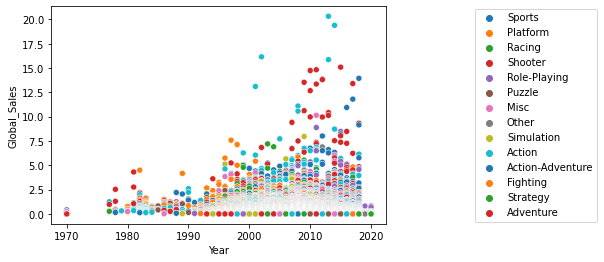

In [44]:
_ = sns.scatterplot(data=sales_no_scores, x='Year', y='Global_Sales', hue='Genre', palette='tab10')
_.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

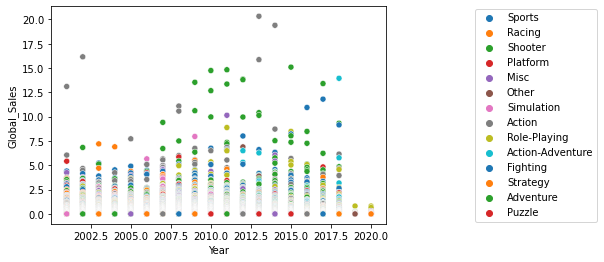

In [45]:
modern = sales_no_scores[sales_no_scores['Year']>2000]
_ = sns.scatterplot(data=modern, x='Year', y='Global_Sales', hue='Genre', palette='tab10')
_.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

In [46]:
dummy_sales_genre = pd.get_dummies(sales_no_scores, columns=['Genre'])
dummy_sales_genre.shape

(54813, 28)

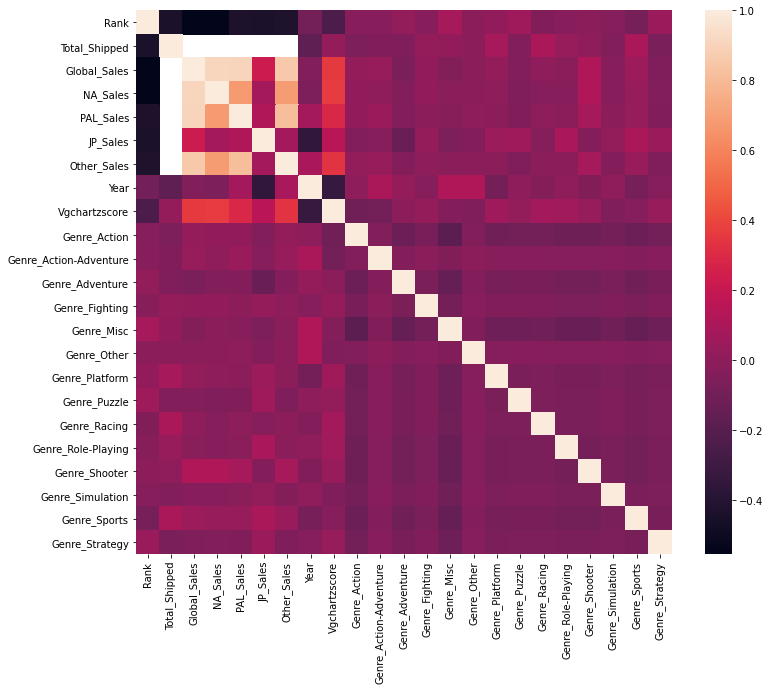

In [47]:
plt.subplots(figsize=(12,10))
sns.heatmap(dummy_sales_genre.corr());

It appears the Role-Playing Genre may have a slight corrilation with sales in Japan. However id does not appear that this corrilation continues for North America, Europe, Other, or Global. However Platformers do appear slightly corrilated with all of the sales. We see this confirmed in the scatterplot of Japan Sales. 

The scatterplot of Global Sales was a bit harder to read, so I restricted to games after 2000 so to get a better understanding, and we see Shooter, Role-Playing, and Action being more popular in recent years.

Note: We can create these scatter plots to specificaly the desired area if we would rather look at regional sales instead of Global, as we did for Japan.

In [48]:
dummy_sales_publisher = pd.get_dummies(sales_no_scores, columns=['Publisher'])
dummy_sales_publisher.shape

(54813, 113)

This appears to be extremely large. In addition the publisher is not necessiarily something under a game designer's control, so we will leave it out for now.

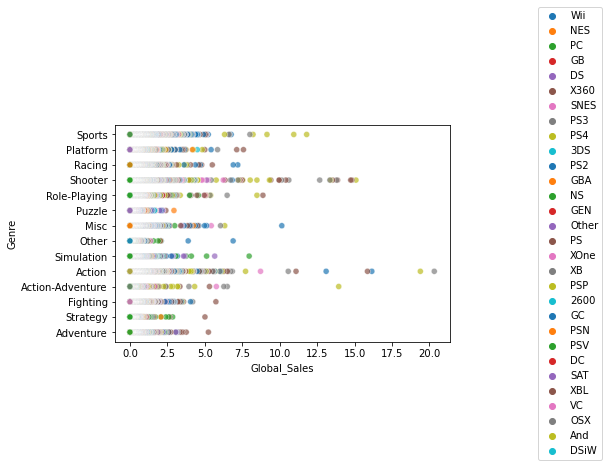

In [49]:
_ = sns.scatterplot(data=sales_no_scores, x='Global_Sales', y='Genre', hue='Platform', palette='tab10', alpha=.7)
_.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

In [50]:
dummy_sales_genre_platform = pd.get_dummies(sales_no_scores, columns=['Genre','Platform'])
dummy_sales_genre_platform.shape

(54813, 57)

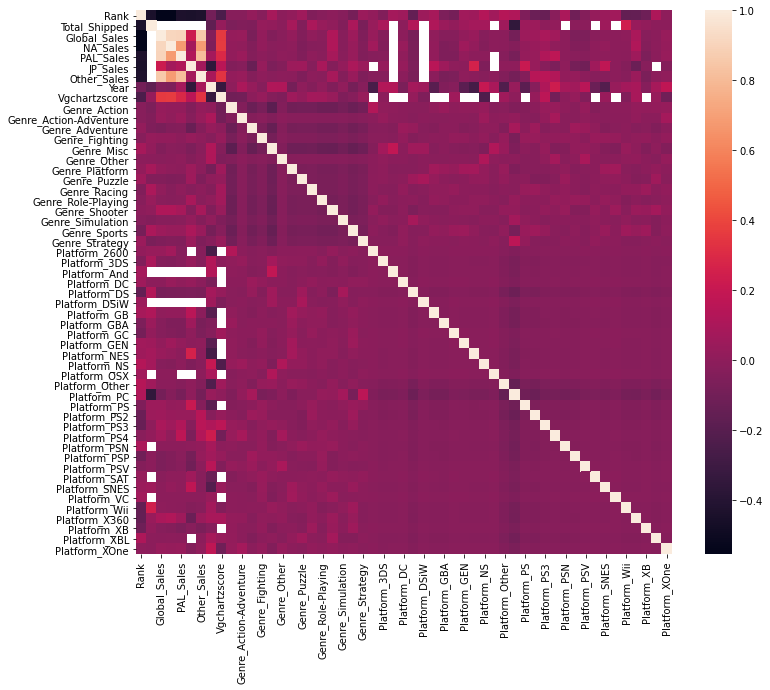

In [51]:
plt.subplots(figsize=(12,10))
sns.heatmap(dummy_sales_genre_platform.corr());

For the sake of looking at modern platforms and making the heat map more legible I will be dropping the columns relating to DS, GameBoy, GameBoy Advanced, Nintendo 64, Nintendo Entertainment System, PlayStation, PlayStation 2, PlayStation 3, Super Nintendo Entertainment System, Wii, and XBox

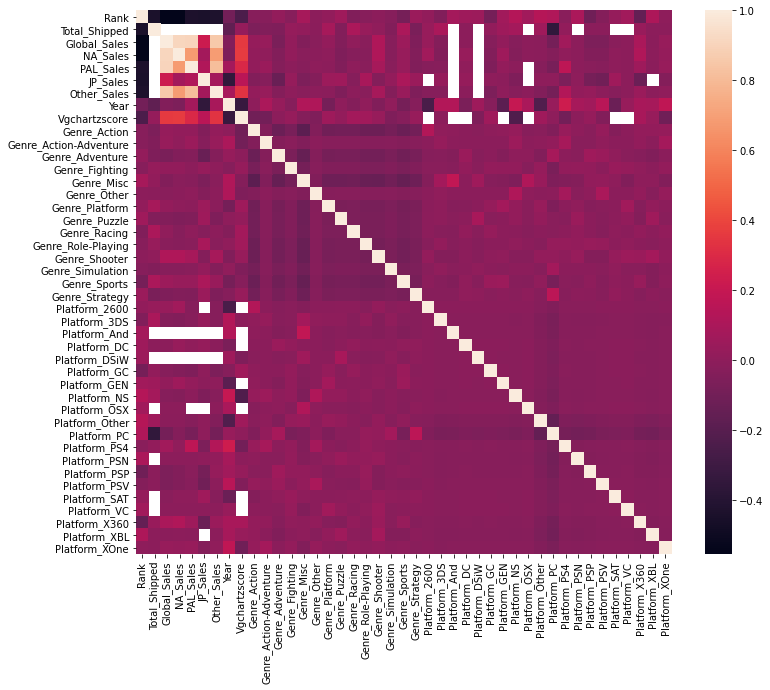

In [52]:
dummy_sales_genre_platform.drop(columns=['Platform_DS', 'Platform_GB', 'Platform_GBA', 'Platform_NES', 'Platform_PS', 'Platform_PS2', 'Platform_PS3', 'Platform_SNES', 'Platform_Wii', 'Platform_XB'], inplace=True)
plt.subplots(figsize=(12,10))
sns.heatmap(dummy_sales_genre_platform.corr());

Though I'm not familiar with 2600 and GEN, their negative corrilation with Year_of_Release, so we'll drop them as well.

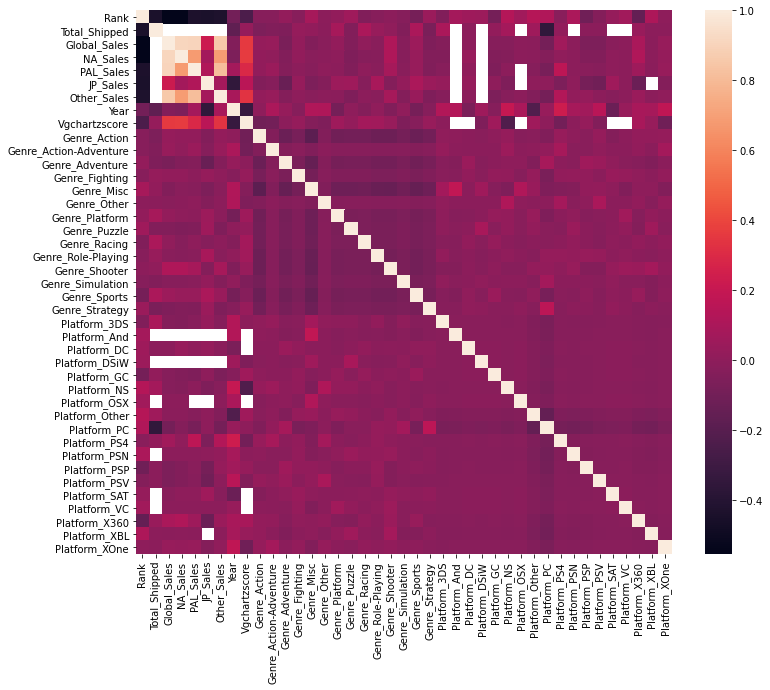

In [53]:
dummy_sales_genre_platform.drop(columns=['Platform_2600', 'Platform_GEN'], inplace=True)
plt.subplots(figsize=(12,10))
sns.heatmap(dummy_sales_genre_platform.corr());

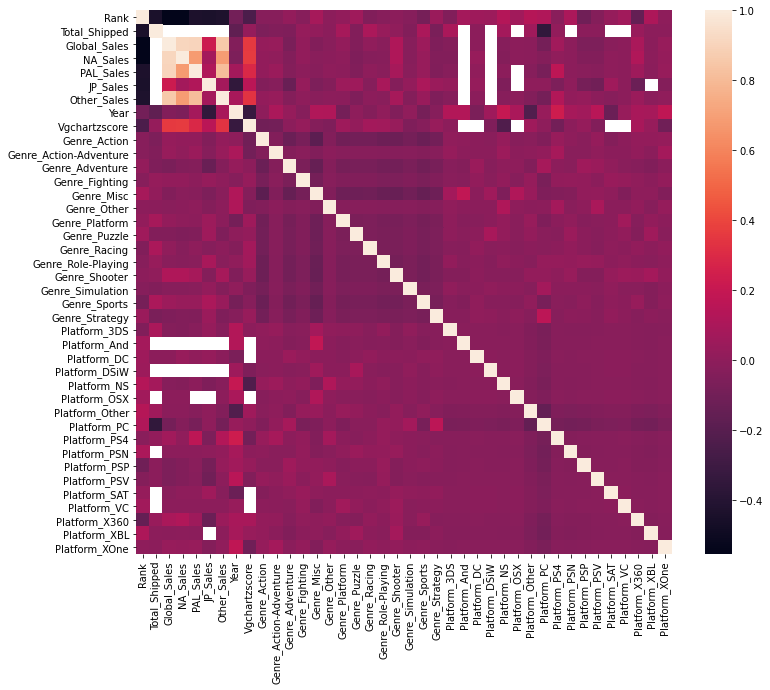

In [54]:
dummy_sales_genre_platform.drop(columns=['Platform_GC'], inplace=True)
plt.subplots(figsize=(12,10))
sns.heatmap(dummy_sales_genre_platform.corr());

Some interesting notes from this data set is that Strategy games seem to be slightly corrilated with PC gamers, Shooters are slightly corrilated between XBox 360 and PC, Adventure is corrilated between the PSP and the PS Vita, and others. These slight corrilations all make sense, though they don't appear strongly corrilated with sales. Next I want to do a similar analysis of the Data with the Rows that have user and critic scores

In [55]:
vg_sales_2019.columns

Index(['Rank', 'Name', 'Genre', 'ESRB_Rating', 'Platform', 'Publisher',
       'Developer', 'Critic_Score', 'User_Score', 'Total_Shipped',
       'Global_Sales', 'NA_Sales', 'PAL_Sales', 'JP_Sales', 'Other_Sales',
       'Year', 'Vgchartzscore'],
      dtype='object')

In [56]:
sales_and_scores = vg_sales_2019
sales_and_scores.shape

(54813, 17)

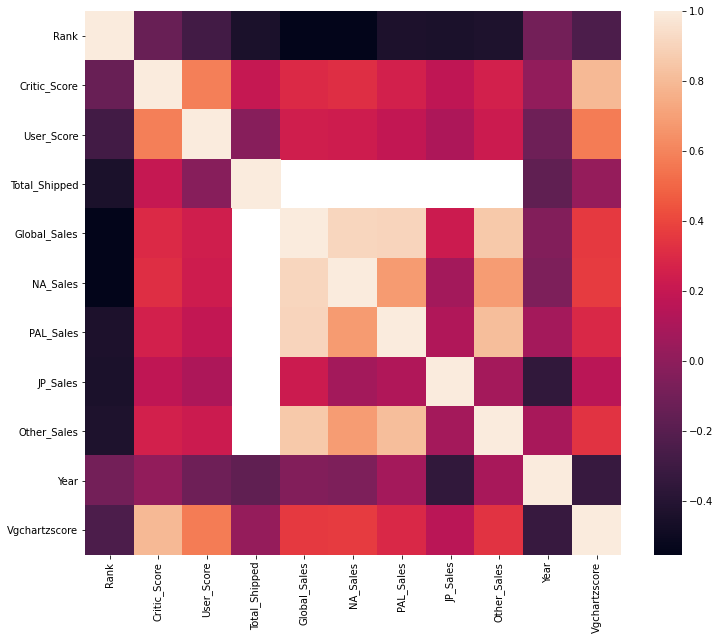

In [57]:
plt.subplots(figsize=(12,10))
sns.heatmap(sales_and_scores.corr());

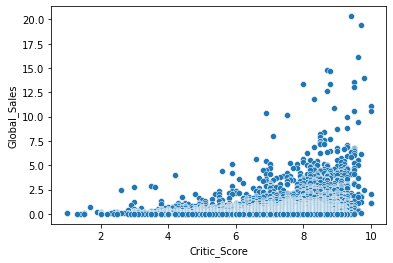

In [58]:
_ = sns.scatterplot(data=sales_and_scores, x='Critic_Score', y='Global_Sales')
#_.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

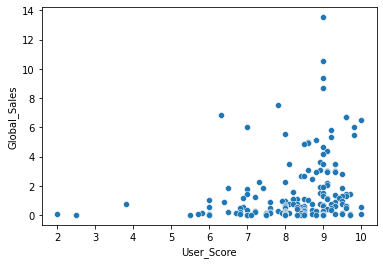

In [59]:
_ = sns.scatterplot(data=sales_and_scores, x='User_Score', y='Global_Sales')
#_.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

The first thing of note is that the Critic_Score and User_Score are strongly corrilated, which is good, we don't want those not corrilated. We will also note that critic score is slightly corrilated with North American and European sales. Now we will do the same corrilation analysis as we did with the last set, but jump straight to the platform and genre dummies.

Looking at the scatter plots we do see Critic and User Scores are corilated with Global Sales.

In [60]:
dummy_sales_scores = pd.get_dummies(sales_and_scores, columns=['Genre','Platform', 'ESRB_Rating'])
dummy_sales_scores.shape

(54813, 63)

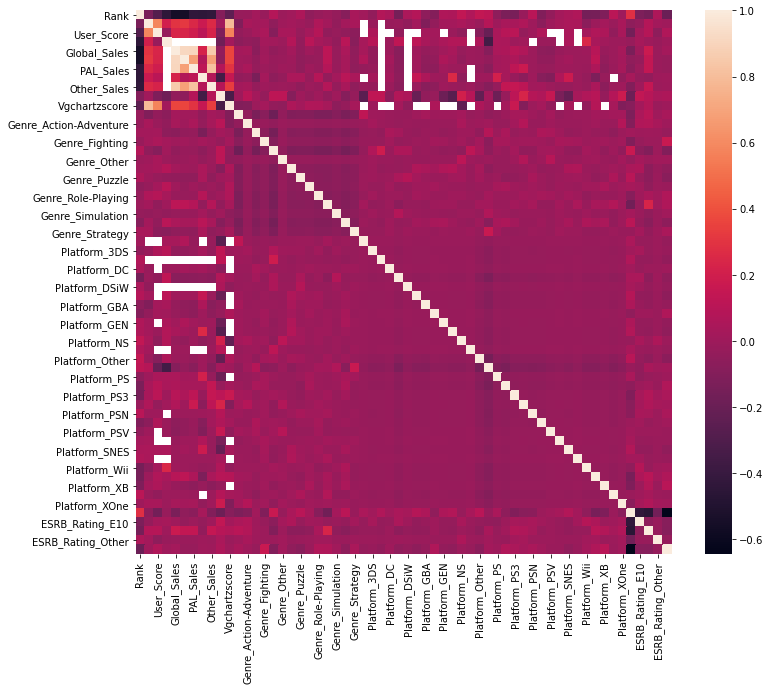

In [61]:
plt.subplots(figsize=(12,10))
sns.heatmap(dummy_sales_scores.corr());

Let's drop the outdated platforms as we did before, something to note: 'Platform_GB',  'Platform_N64',  'Platform_NES',  'Platform_SNES',  'Platform_GEN',  'Platform_2600', and 'Platform_SAT' aren't in this set. This makes sense as these are older game systems, and previously I had hypothesized that the missing values in the Scores was corrilated with the year of release, and this more or less confirms that.

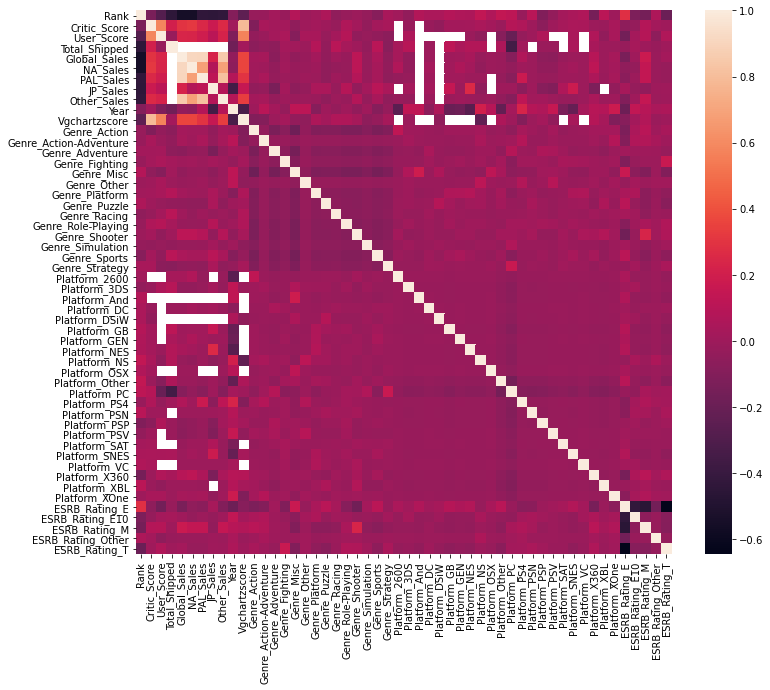

In [62]:
dummy_sales_scores.drop(columns=['Platform_DS', 'Platform_GBA', 'Platform_PS', 'Platform_PS2', 'Platform_PS3', 'Platform_Wii', 'Platform_XB', 'Platform_GC'], inplace=True)
plt.subplots(figsize=(12,10))
sns.heatmap(dummy_sales_scores.corr());

Let's also drop sales as we've already looked at the corrilation of sales already

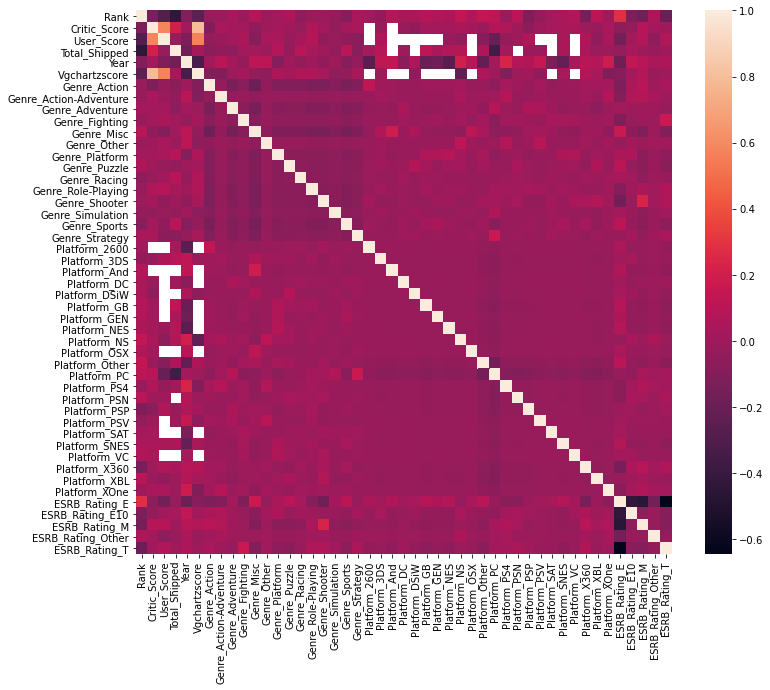

In [63]:
dummy_sales_scores.drop(columns=['NA_Sales', 'PAL_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'], inplace=True)
plt.subplots(figsize=(12,10))
sns.heatmap(dummy_sales_scores.corr());

There does not appear to be a strong corrilation between scores and specific genre's or platforms. There are very slight corrilations between Critic_Score and the Sports Genre, Critic_Score and PC games, and User_Score and Role-Playing games. For now we'll leave this and look at if we can determine a cut off for popularity of a game with either the score or the sales.

In [64]:
sales_and_scores.columns

Index(['Rank', 'Name', 'Genre', 'ESRB_Rating', 'Platform', 'Publisher',
       'Developer', 'Critic_Score', 'User_Score', 'Total_Shipped',
       'Global_Sales', 'NA_Sales', 'PAL_Sales', 'JP_Sales', 'Other_Sales',
       'Year', 'Vgchartzscore'],
      dtype='object')

<AxesSubplot:>

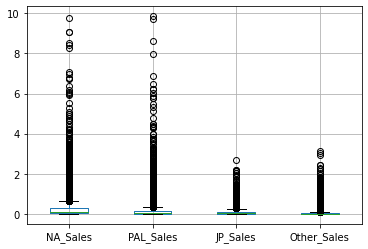

In [65]:
sales_and_scores.boxplot(column=['NA_Sales', 'PAL_Sales', 'JP_Sales', 'Other_Sales'])

In [66]:
sales_and_scores.describe()

,Rank,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Vgchartzscore
count,54813.000000,6532.000000,328.000000,1827.000000,19377.000000,12958.000000,13165.000000,7035.000000,15496.000000,54813.000000,756.000000
mean,27507.718735,7.214590,8.272256,1.887258,0.366213,0.275669,0.155540,0.110522,0.044793,2005.659095,7.488492
std,15923.622496,1.453208,1.392177,4.195693,0.833683,0.512893,0.399567,0.184743,0.129650,8.355585,1.375553
min,1.000000,1.000000,2.000000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,1970.000000,2.600000
25%,13704.000000,6.400000,7.800000,0.200000,0.030000,0.050000,0.010000,0.020000,0.000000,2000.000000,6.900000
50%,27492.000000,7.500000,8.500000,0.590000,0.120000,0.120000,0.040000,0.050000,0.010000,2008.000000,7.900000
75%,41232.000000,8.300000,9.200000,1.800000,0.360000,0.290000,0.140000,0.120000,0.040000,2011.000000,8.500000
max,55791.000000,10.000000,10.000000,82.860000,20.320000,9.760000,9.850000,2.690000,3.120000,2020.000000,9.600000


If you look at all the previous heat maps you may have noted that rank was negatively corrilated with sales, so we can use this as a determinate of the "most popular games

In [67]:
vg_sales_2019

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Vgchartzscore
0,1,Wii Sports,Sports,E,Wii,Nintendo,Nintendo EAD,7.7,NaN,82.86,NaN,NaN,NaN,NaN,NaN,2006.0,NaN
1,2,Super Mario Bros.,Platform,E,NES,Nintendo,Nintendo EAD,10.0,NaN,40.24,NaN,NaN,NaN,NaN,NaN,1985.0,NaN
2,3,Mario Kart Wii,Racing,E,Wii,Nintendo,Nintendo EAD,8.2,9.1,37.14,NaN,NaN,NaN,NaN,NaN,2008.0,8.7
3,4,PlayerUnknown's Battlegrounds,Shooter,E,PC,Other,Other,NaN,NaN,36.60,NaN,NaN,NaN,NaN,NaN,2017.0,NaN
4,5,Wii Sports Resort,Sports,E,Wii,Nintendo,Nintendo EAD,8.0,8.8,33.09,NaN,NaN,NaN,NaN,NaN,2009.0,8.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55786,55787,In the Valley of Gods,Adventure,E,PC,Other,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.0,NaN
55787,55788,Indivisible,Role-Playing,E,PC,505 Games,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.0,NaN
55788,55789,Lost Ember,Adventure,Other,PC,Other,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.0,NaN
55789,55790,Lost Ember,Adventure,Other,PS4,Other,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.0,NaN


In [68]:
most_pop_games = vg_sales_2019[vg_sales_2019['Rank'] <= 500]
most_pop_games.shape

(500, 17)

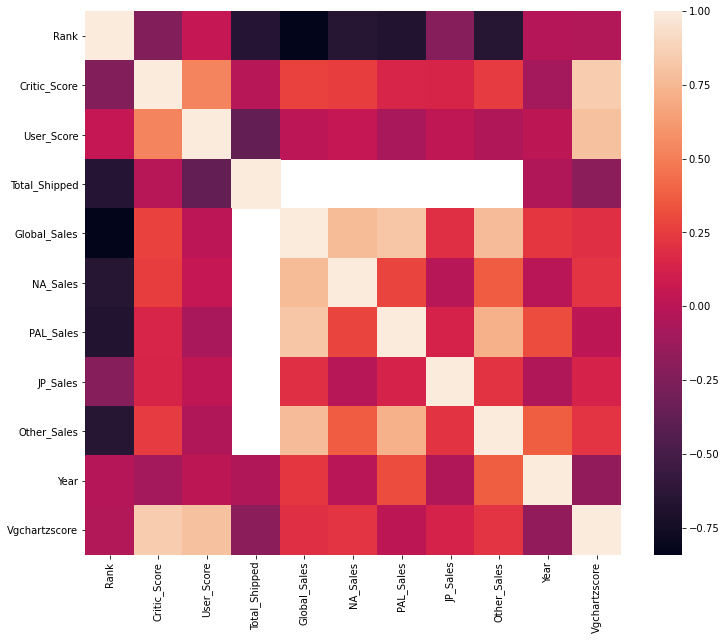

In [69]:
plt.subplots(figsize=(12,10))
sns.heatmap(most_pop_games.corr());

In our top video games we see a corrilation with Critic_Sores and sales, and we see that Critic and User Scores are still corrilated.

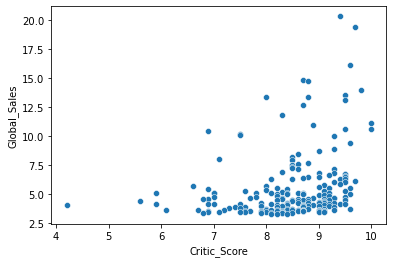

In [70]:
_ = sns.scatterplot(data=most_pop_games, x='Critic_Score', y='Global_Sales')
#_.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

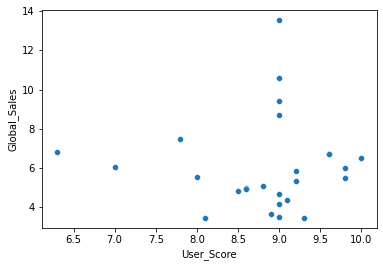

In [71]:
_ = sns.scatterplot(data=most_pop_games, x='User_Score', y='Global_Sales')
#_.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

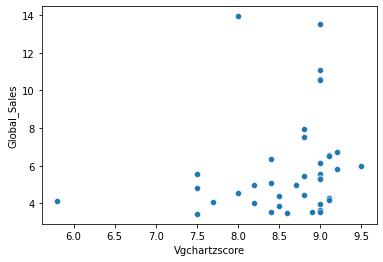

In [72]:
_ = sns.scatterplot(data=most_pop_games, x='Vgchartzscore', y='Global_Sales')

In [73]:
most_pop_games.columns

Index(['Rank', 'Name', 'Genre', 'ESRB_Rating', 'Platform', 'Publisher',
       'Developer', 'Critic_Score', 'User_Score', 'Total_Shipped',
       'Global_Sales', 'NA_Sales', 'PAL_Sales', 'JP_Sales', 'Other_Sales',
       'Year', 'Vgchartzscore'],
      dtype='object')

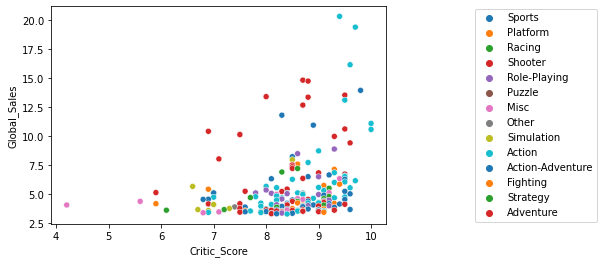

In [74]:
_ = sns.scatterplot(data=most_pop_games, x='Critic_Score', y='Global_Sales', hue='Genre', palette='tab10')
_.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

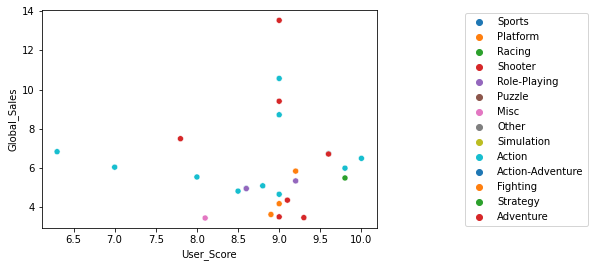

In [75]:
_ = sns.scatterplot(data=most_pop_games, x='User_Score', y='Global_Sales', hue='Genre', palette='tab10')
_.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

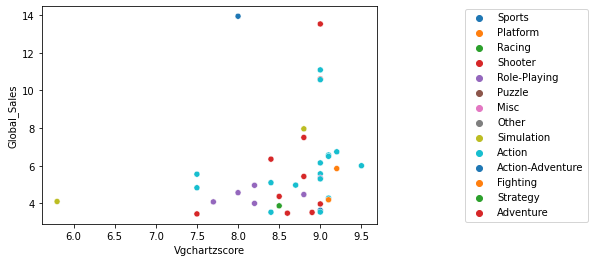

In [76]:
_ = sns.scatterplot(data=most_pop_games, x='Vgchartzscore', y='Global_Sales', hue='Genre', palette='tab10')
_.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

Looking at our most popular games the ones that stand out are Action, Role-Playing, Shooting, Racing, Platform and Sports.

Action (purple) - Both User and Critic Scores appear fairly high for these games. Action is a solid choice for Genre

Role-Playing (light blue) - The User and Critic Scores appear to agree, though slightly lower sales than Action, still a solid option

Shooting (Pink) - It looks as if Critics like this genre more than users, sales are slightly higher than RP games, but lower than the potential of the Action games

Racing (Orange)- User and Critics seem to agree on the scores, they are less popular than Action (as far as scores), but have a higher potential for sales. We could hypothesise that this is because Racing games tend to have more co-op options, thus the need for players to have friends who play the game so they can play together.

Sports (Dark Blue)- Just like Shooting, Critics like these games more than users, and a suprisingly high sales similar to Racing. Do these games tend to have co-op options?

Platform (Green) - There doesn't seem to be many of these in the popular games, however those that are here are scored high and have a decent number of sales. This sounds like a High Risk/High Reward genre.

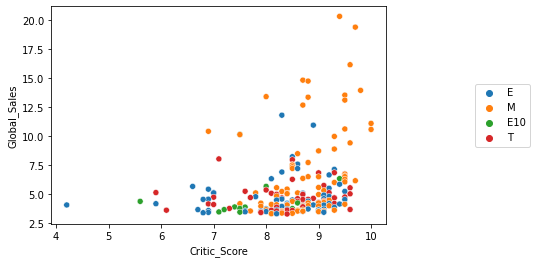

In [77]:
_ = sns.scatterplot(data=most_pop_games, x='Critic_Score', y='Global_Sales', hue='ESRB_Rating')
_.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

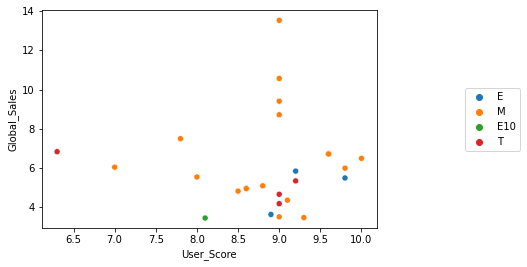

In [78]:
_ = sns.scatterplot(data=most_pop_games, x='User_Score', y='Global_Sales', hue='ESRB_Rating')
_.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

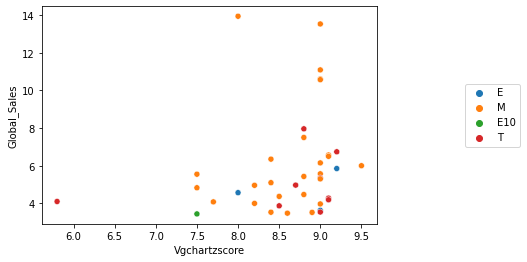

In [79]:
_ = sns.scatterplot(data=most_pop_games, x='Vgchartzscore', y='Global_Sales', hue='ESRB_Rating')
_.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

Looking at the Ratings, it appears that making a game with a rating of Mature or Teen is mroe popular amongs Users and Critics, with Everyone having a higher sales potentions, likely because the rating allows them to reach a younger audience. 

It appears that having a Mature rating has higher sales than Teen ratings.

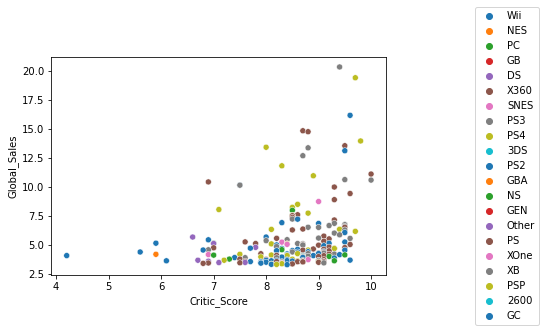

In [80]:
_ = sns.scatterplot(data=most_pop_games, x='Critic_Score', y='Global_Sales', hue='Platform', palette='tab10')
_.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

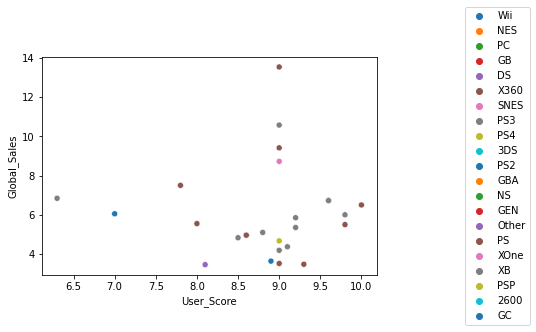

In [81]:
_ = sns.scatterplot(data=most_pop_games, x='User_Score', y='Global_Sales', hue='Platform', palette='tab10')
_.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

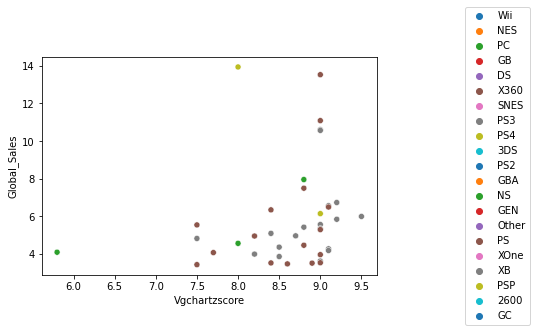

In [82]:
_ = sns.scatterplot(data=most_pop_games, x='Vgchartzscore', y='Global_Sales', hue='Platform', palette='tab10')
_.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

It doesn't appear as if the critics have a prefrence in Platform, where as it looks like the Useres like the PSP, PS2, and 3DS and appear to dislike the XBox 360 and PS3.

In [83]:
dummy_popular = pd.get_dummies(most_pop_games, columns=['Genre','Platform', 'ESRB_Rating'])
dummy_popular.shape

(500, 53)

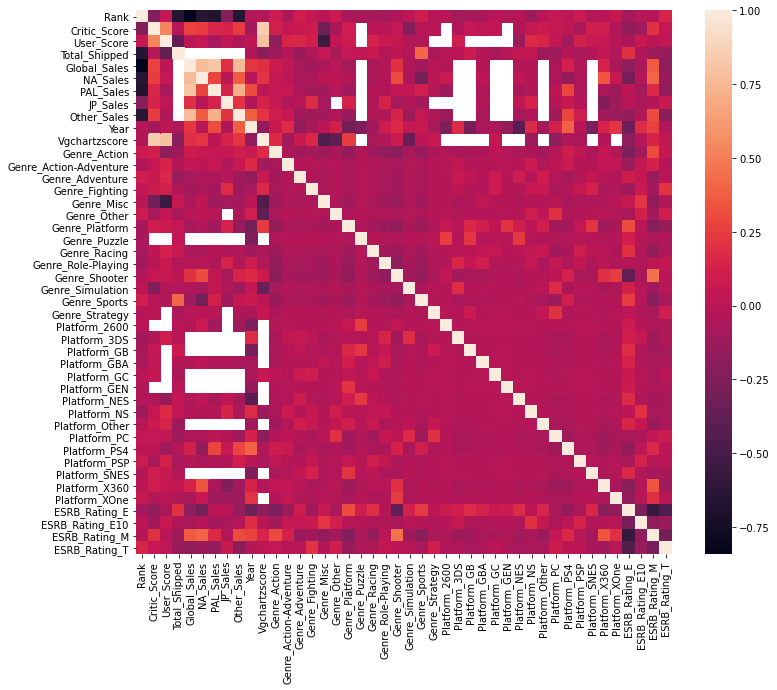

In [84]:
dummy_popular.drop(columns=['Platform_DS', 'Platform_PS', 'Platform_PS2', 'Platform_PS3', 'Platform_Wii', 'Platform_XB'], inplace=True)
plt.subplots(figsize=(12,10))
sns.heatmap(dummy_popular.corr());

In [85]:
corr_matrix = dummy_popular.corr()
print(corr_matrix["Critic_Score"].sort_values(ascending=False))

Critic_Score              1.000000
Vgchartzscore             0.844249
User_Score                0.528755
Global_Sales              0.278289
NA_Sales                  0.258615
Other_Sales               0.251544
ESRB_Rating_M             0.204404
PAL_Sales                 0.146015
JP_Sales                  0.140491
Genre_Action              0.113041
Platform_SNES             0.107834
Genre_Platform            0.098745
Platform_X360             0.091326
Genre_Fighting            0.080976
Platform_Other            0.073439
Genre_Adventure           0.071016
Genre_Action-Adventure    0.057662
Platform_NS               0.054167
Platform_GB               0.051949
Genre_Shooter             0.047713
Platform_PC               0.045586
ESRB_Rating_T             0.045289
Platform_GC               0.043041
Platform_GBA              0.023122
Platform_PS4              0.015131
Genre_Racing              0.012218
Genre_Role-Playing        0.004829
Genre_Strategy            0.002242
Total_Shipped       

In [86]:
print(corr_matrix["User_Score"].sort_values(ascending=False))

User_Score                1.000000
Vgchartzscore             0.792676
Critic_Score              0.528755
Platform_NS               0.168355
Genre_Adventure           0.158314
Genre_Action-Adventure    0.139151
Platform_Other            0.138232
Genre_Racing              0.126692
Platform_PSP              0.118150
Genre_Fighting            0.112887
Platform_3DS              0.096913
Genre_Platform            0.085190
Genre_Role-Playing        0.070295
Platform_SNES             0.068754
ESRB_Rating_E10           0.063266
Genre_Shooter             0.052395
Rank                      0.049779
NA_Sales                  0.046521
Platform_X360             0.045866
Genre_Other               0.040596
Platform_PC               0.040596
ESRB_Rating_T             0.035655
JP_Sales                  0.025812
Year                      0.020455
Global_Sales              0.013581
ESRB_Rating_M             0.005361
Platform_XOne            -0.001643
Genre_Sports             -0.029801
Genre_Simulation    

In [87]:
print(corr_matrix["Global_Sales"].sort_values(ascending=False))

Global_Sales              1.000000
PAL_Sales                 0.813833
Other_Sales               0.772549
NA_Sales                  0.765414
ESRB_Rating_M             0.360950
Critic_Score              0.278289
Year                      0.223666
Genre_Shooter             0.208606
Vgchartzscore             0.197625
JP_Sales                  0.197135
Platform_X360             0.130170
Platform_PS4              0.117022
Genre_Action              0.081134
Genre_Action-Adventure    0.035597
User_Score                0.013581
Genre_Other              -0.005941
Genre_Strategy           -0.012245
Platform_NS              -0.021568
Genre_Role-Playing       -0.025866
Platform_GBA             -0.028561
Platform_NES             -0.030044
Platform_PSP             -0.033420
Platform_2600            -0.035515
Genre_Simulation         -0.042746
Platform_PC              -0.052308
Platform_XOne            -0.059233
Genre_Racing             -0.062727
Genre_Misc               -0.067934
ESRB_Rating_E10     

In [88]:
most_pop_games['Year'].describe()

count     500.000000
mean     2006.838000
std         7.577241
min      1981.000000
25%      2002.000000
50%      2008.000000
75%      2013.000000
max      2018.000000
Name: Year, dtype: float64

Looking at our "most popular" games we see some more corralations. The most interesting to note, while still not highly corralted are: Critic and Action, Critic and Shooter, User and Action, User and Platform, User and Fighting, User and Racing, User and Roleplaying, 

According to History.com the "Modern Age of Gaming" started around 2005, let's see if cutting off at 2000 will effect any of our correlations.

<AxesSubplot:>

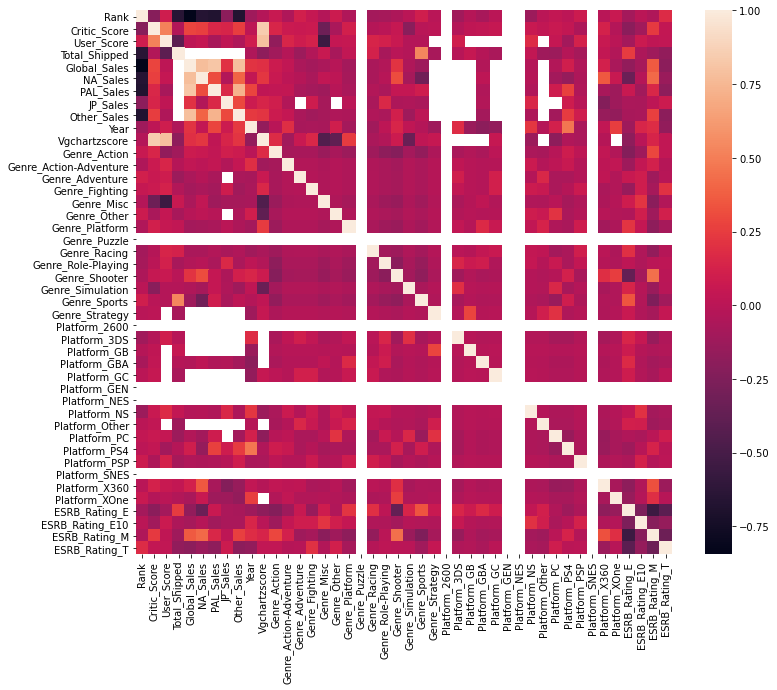

In [89]:
modern_most_pop = dummy_popular[dummy_popular['Year']>=2000]
modern_corr = modern_most_pop.corr()
plt.subplots(figsize=(12,10))
sns.heatmap(modern_corr)

In [90]:
print(modern_corr["Critic_Score"].sort_values(ascending=False))

Critic_Score              1.000000
Vgchartzscore             0.844249
User_Score                0.512036
Global_Sales              0.284841
NA_Sales                  0.264345
Other_Sales               0.257382
ESRB_Rating_M             0.239544
PAL_Sales                 0.155996
Genre_Action              0.147814
JP_Sales                  0.138792
Platform_X360             0.122818
Genre_Platform            0.108251
Genre_Fighting            0.074552
Genre_Action-Adventure    0.072428
Genre_Adventure           0.067693
Platform_NS               0.067411
Platform_PC               0.063960
Platform_GC               0.053965
Genre_Shooter             0.049474
ESRB_Rating_T             0.040910
Platform_PS4              0.035331
Platform_GBA              0.033807
Platform_Other            0.028492
Platform_GB               0.022388
Year                      0.017539
Genre_Strategy            0.005835
Genre_Role-Playing        0.000559
Genre_Sports             -0.001575
Genre_Racing        

This appears to be much of the same information as we had without cutting off by years, we will leave this data set for now, and work on the next one.

# V. Tagged Steam Data

It may be easier to work with the unmerged data first with how large this data set is, since one of the things I want to do is to look at the tag data and convert it to a True/False (1/0) data instead of the number that there are.

In [91]:
tags_tf = pd.read_csv("C:/Users/book_/OneDrive/Documents/GitHub/Capstone2-Video-Game-Popularity/csv_files/boolean_tags.csv", index_col='appid')
tags_tf.head()

,1980s,1990s,2.5d,2d,2d_fighter,360_video,3d,3d_platformer,3d_vision,4_player_local,...,warhammer_40k,web_publishing,werewolves,western,word_game,world_war_i,world_war_ii,wrestling,zombies,e_sports
appid,,,,,,,,,,,,,,,,,,,,,
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
40,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
steam_data_2019 = pd.read_csv("C:/Users/book_/OneDrive/Documents/GitHub/Capstone2-Video-Game-Popularity/csv_files/steam_data.csv",index_col='appid')
steam_data_2019.head()

,name,release_date,english,developer,publisher,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
appid,,,,,,,,,,,,,
10,Counter-Strike,2000-11-01,1,Valve,Valve,0,0,124534,3339,17612,317,10000000-20000000,7.19
20,Team Fortress Classic,1999-04-01,1,Valve,Valve,0,0,3318,633,277,62,5000000-10000000,3.99
30,Day of Defeat,2003-05-01,1,Valve,Valve,0,0,3416,398,187,34,5000000-10000000,3.99
40,Deathmatch Classic,2001-06-01,1,Valve,Valve,0,0,1273,267,258,184,5000000-10000000,3.99
50,Half-Life: Opposing Force,1999-11-01,1,Other,Valve,0,0,5250,288,624,415,5000000-10000000,3.99


In [93]:
steam_data_2019['rating_percent_pos'] = steam_data_2019['positive_ratings']/(steam_data_2019['negative_ratings'] + steam_data_2019['positive_ratings'])
steam_data_2019.dtypes

name                   object
release_date           object
english                 int64
developer              object
publisher              object
required_age            int64
achievements            int64
positive_ratings        int64
negative_ratings        int64
average_playtime        int64
median_playtime         int64
owners                 object
price                 float64
rating_percent_pos    float64
dtype: object

In [94]:
steam_data_2019['release_date'] = pd.to_datetime(steam_data_2019['release_date'])
steam_data_2019.dtypes

name                          object
release_date          datetime64[ns]
english                        int64
developer                     object
publisher                     object
required_age                   int64
achievements                   int64
positive_ratings               int64
negative_ratings               int64
average_playtime               int64
median_playtime                int64
owners                        object
price                        float64
rating_percent_pos           float64
dtype: object

In [95]:
steam_data_2019['price'].describe()

count    27075.000000
mean         6.078193
std          7.874922
min          0.000000
25%          1.690000
50%          3.990000
75%          7.190000
max        421.990000
Name: price, dtype: float64

In [96]:
steam_data_2019[steam_data_2019['price']>=50]

,name,release_date,english,developer,publisher,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,rating_percent_pos
appid,,,,,,,,,,,,,,
100980,3DCoat 4.8,2012-10-02,1,Other,Other,0,0,75,5,0,0,0-20000,95.99,0.937500
220700,RPG Maker VX Ace,2012-12-10,1,Other,Degica,0,0,3372,210,405,465,500000-1000000,52.99,0.941374
244830,Wing IDE 5,2014-04-30,1,Other,Other,0,0,16,2,0,0,0-20000,60.99,0.888889
248170,Clickteam Fusion 2.5,2013-12-05,1,Other,Clickteam,0,0,616,71,0,0,100000-200000,69.99,0.896652
251810,Leadwerks Game Engine,2014-01-06,1,Other,Other,0,3,211,77,0,0,20000-50000,78.99,0.732639
253670,Aartform Curvy 3D 3.0,2013-11-12,1,Other,Other,0,0,33,12,0,0,0-20000,75.99,0.733333
269950,X-Plane 11,2017-03-30,1,Other,Other,0,0,2033,443,44169,44169,100000-200000,54.99,0.821082
321410,Command: Modern Air / Naval Operations WOTY,2014-09-26,1,Other,Slitherine Ltd.,0,0,424,78,0,0,20000-50000,60.99,0.844622
325180,AppGameKit: Easy Game Development,2014-11-21,1,Other,Other,0,0,225,27,1,1,50000-100000,60.99,0.892857


In [97]:
steam_data_2019 = steam_data_2019[steam_data_2019['price']<50]

Looking at this data we see that 10 of the 11 games that cost over $100 are extremely unpopular with 0 average and mean play time, and relatively low numbers of reviews. As for the 11th game, "GameMaker Studio 2 Web" This is not a game it is a program created to help people to create and make a new game. With this information I am choosing to drop these outliers as they are unpopular or just not even a game.

When lowering this threshold to $50 only 6 of 38 games have thier average and/or median playtime over 0 minutes, and 3 of those 6 are programs to make a game, and not themselves games.

So for now let's note the 3 outliers in this area but go ahead and utilize this $50 cut off. The outliers we are losing and will want to look at later are

$54.99 - Dead or Alive 6

$54.99 - Warriors Orochi 4

$54.99 - X-Plane 11

Something to note as we go into this we do not have sales information with this data set, so we plan on using the rating ratio to determine popularity.

In [98]:
sample = steam_data_2019.sample(frac=.1)

(array([909., 665., 498., 118., 198., 100.,  68.,  40.,   2.,  49.,   8.,
         17.,   1.,   7.,   1.,  10.,   0.,   8.,   2.,   3.]),
 array([ 0.    ,  2.4995,  4.999 ,  7.4985,  9.998 , 12.4975, 14.997 ,
        17.4965, 19.996 , 22.4955, 24.995 , 27.4945, 29.994 , 32.4935,
        34.993 , 37.4925, 39.992 , 42.4915, 44.991 , 47.4905, 49.99  ]),
 <BarContainer object of 20 artists>)

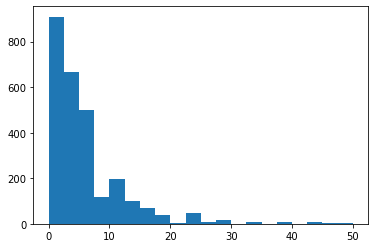

In [99]:
%matplotlib inline
plt.hist(x=sample['price'], bins = 20)

In [100]:
sample_corr = sample.corr()
print(sample_corr["price"].sort_values(ascending=False))

price                 1.000000
negative_ratings      0.264944
required_age          0.164327
positive_ratings      0.139695
rating_percent_pos    0.065110
average_playtime      0.050820
median_playtime       0.050008
achievements          0.000290
english              -0.003240
Name: price, dtype: float64


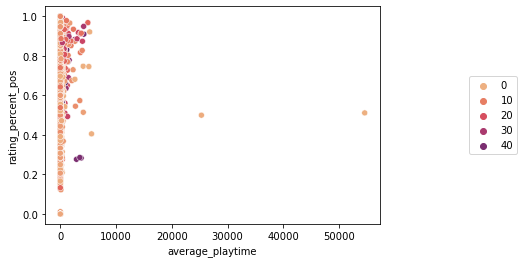

In [101]:
_ = sns.scatterplot(data=sample, x='average_playtime', y='rating_percent_pos', hue='price', palette='flare')
_.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

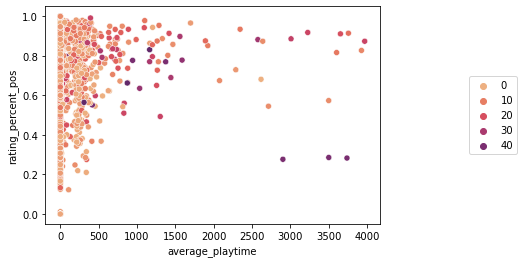

In [102]:
_ = sns.scatterplot(data=sample[sample['average_playtime']<4000], x='average_playtime', y='rating_percent_pos', hue='price', palette='flare')
_.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

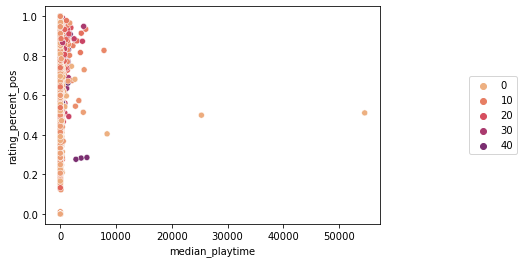

In [103]:
_ = sns.scatterplot(data=sample, x='median_playtime', y='rating_percent_pos', hue='price', palette='flare')
_.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

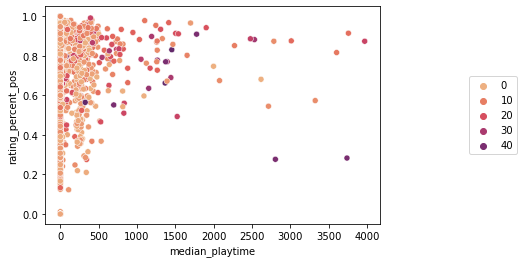

In [104]:
_ = sns.scatterplot(data=sample[sample['median_playtime']<4000], x='median_playtime', y='rating_percent_pos', hue='price', palette='flare')
_.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

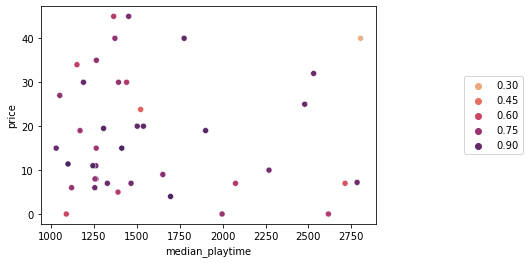

In [105]:
playtime = (sample['median_playtime'] > 1000) & (sample['median_playtime'] < 3000)
_ = sns.scatterplot(data=sample[playtime], x='median_playtime', y='price', hue='rating_percent_pos', palette='flare')
_.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

It is good to see that the average and median playtime data seems to agree that above 1000 minutes (16.67 hours) appears to have more postive reviews than negative. This in combination with our earlier discoveries we can conclude that it would be good to set our play time between 16 and 50 hours.

We also see that prices, that most games cost less than 20 dollars. In our play time range of 16-50 hours we see that we can charge between 20 and 40 dollars for a longer game without loosing popularity (percentage of positive reviews), however the higher prices come with lower reviews if the game is shorter

In [106]:
tags_tf.sum().sort_values(ascending=False).head(10)

indie           17937
action          11029
casual           9719
adventure        9212
strategy         5168
simulation       4925
rpg              4197
early_access     3014
free_to_play     2294
sports           1712
dtype: int64

Looking at the top 10 tags these are mostly genres (action, adventure, strategy, simulation, rpg, sports) where the others are production:

indie - these are games made by individuals or smaller developement teams, not a large game puchlisher. These games are very popular right now.

casual - in a world of increasing competitiveness, "casual" means the game has non competitive features. A player doesn't have to fight/compete against other players and there isn't an emphasis on "grinding". "Casual" could also mean the game is more accessible to "lower level" gamers, the gamers don't have to exert a lot of effort in order to complete the game.

early_access - this is early releases for game testing, this tag is used to acknowledge that there may still be bugs in the game and the expectation of further updates as we finish production of the game. This is good for beta testing.

free_to_play - it is free to play the base version of the game, but other parts of the game may require micro transactions to access

In [107]:
tags_tf = tags_tf.reset_index()
tags_tf

,appid,1980s,1990s,2.5d,2d,2d_fighter,360_video,3d,3d_platformer,3d_vision,...,warhammer_40k,web_publishing,werewolves,western,word_game,world_war_i,world_war_ii,wrestling,zombies,e_sports
0,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,30,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,40,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,50,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29017,1065230,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29018,1065570,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29019,1065650,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29020,1066700,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [108]:
top_10 = ['appid', 'indie', 'action', 'casual', 'adventure', 'strategy', 'simulation', 'rpg', 'early_access', 'free_to_play', 'sports']
top10tags = tags_tf.filter(items= top_10)

top_10_cat = (top10tags.melt(id_vars='appid', var_name='tag')
       .query('value== 1')
       .drop('value',1))
top_10_cat

,appid,tag
26,1002,indie
32,1500,indie
35,1530,indie
61,2400,indie
62,2420,indie
...,...,...
290119,1051500,sports
290131,1052870,sports
290145,1053780,sports
290154,1054930,sports


In [109]:
top_10_tags_merged = pd.merge(
    top_10_cat,
    steam_data_2019,
    on='appid',
    sort=True
)
top_10_tags_merged.dropna(inplace=True)

top_10_tags_merged

,appid,tag,name,release_date,english,developer,publisher,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,rating_percent_pos
0,10,action,Counter-Strike,2000-11-01,1,Valve,Valve,0,0,124534,3339,17612,317,10000000-20000000,7.19,0.973888
1,20,action,Team Fortress Classic,1999-04-01,1,Valve,Valve,0,0,3318,633,277,62,5000000-10000000,3.99,0.839787
2,40,action,Deathmatch Classic,2001-06-01,1,Valve,Valve,0,0,1273,267,258,184,5000000-10000000,3.99,0.826623
3,50,action,Half-Life: Opposing Force,1999-11-01,1,Other,Valve,0,0,5250,288,624,415,5000000-10000000,3.99,0.947996
4,60,action,Ricochet,2000-11-01,1,Valve,Valve,0,0,2758,684,175,10,5000000-10000000,3.99,0.801278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61709,1066700,casual,New Yankee 7: Deer Hunters,2019-04-17,1,Other,Alawar Entertainment,0,0,2,0,0,0,0-20000,5.19,1.000000
61710,1066700,adventure,New Yankee 7: Deer Hunters,2019-04-17,1,Other,Alawar Entertainment,0,0,2,0,0,0,0-20000,5.19,1.000000
61711,1069460,indie,Rune Lord,2019-04-24,1,Other,Alawar Entertainment,0,0,4,0,0,0,0-20000,5.19,1.000000
61712,1069460,casual,Rune Lord,2019-04-24,1,Other,Alawar Entertainment,0,0,4,0,0,0,0-20000,5.19,1.000000


(617, 16)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

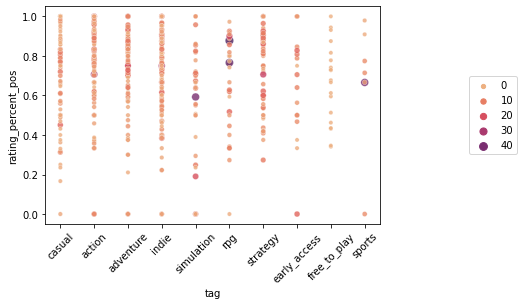

In [110]:
top_10_sample = top_10_tags_merged.sample(frac=.01)
print(top_10_sample.shape)
_ = sns.scatterplot(data=top_10_sample, x='tag', y='rating_percent_pos', hue='price', size='price', palette='flare', alpha=.8)
_.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.xticks(rotation=45)

Noting in this scatterplot of the top 10 tags, we see that indie games have a more volitile rating, but also on the cheaper side of games. It also makes sense that we see the free_to_play and early_access games on the cheaper side as well.

We can see higher prices with action and strategy.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

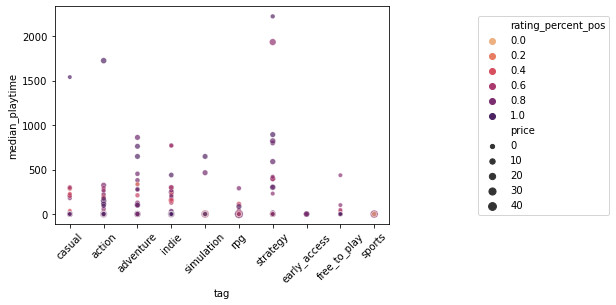

In [111]:
_ = sns.scatterplot(data=top_10_sample[top_10_sample['median_playtime']<4000], x='tag', y='median_playtime', hue='rating_percent_pos', palette='flare', size='price', alpha=.7)
_.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.xticks(rotation=45)

We see with this plot that games that have longer playtimes have both highter ratings and higher prices

In [112]:
tags_tf.columns
tags_cat = (tags_tf.melt(var_name='tag')
       .query('value== 1')
       .drop('value',1))
tags_cat.index.name = 'appid'
tags_cat.head()

,tag
appid,
29324,1980s
29366,1980s
29367,1980s
29498,1980s
29499,1980s


In [113]:
tags = tags_cat['tag'].unique().tolist()
tags

['1980s',
 '1990s',
 '2.5d',
 '2d',
 '2d_fighter',
 '360_video',
 '3d',
 '3d_platformer',
 '3d_vision',
 '4_player_local',
 '4x',
 '6dof',
 'atv',
 'abstract',
 'action',
 'action_rpg',
 'action_adventure',
 'addictive',
 'adventure',
 'agriculture',
 'aliens',
 'alternate_history',
 'america',
 'animation_&_modeling',
 'anime',
 'arcade',
 'arena_shooter',
 'artificial_intelligence',
 'assassin',
 'asynchronous_multiplayer',
 'atmospheric',
 'audio_production',
 'bmx',
 'base_building',
 'baseball',
 'based_on_a_novel',
 'basketball',
 'batman',
 'battle_royale',
 'beat_em_up',
 'beautiful',
 'benchmark',
 'bikes',
 'blood',
 'board_game',
 'bowling',
 'building',
 'bullet_hell',
 'bullet_time',
 'crpg',
 'capitalism',
 'card_game',
 'cartoon',
 'cartoony',
 'casual',
 'cats',
 'character_action_game',
 'character_customization',
 'chess',
 'choices_matter',
 'choose_your_own_adventure',
 'cinematic',
 'city_builder',
 'class_based',
 'classic',
 'clicker',
 'co_op',
 'co_op_campaign'

In [114]:
animation = ['2.5d', '2d', '2d_fighter', '3d', '3d_platformer', '3d_vision']

genre = ['action', 'action_rpg', 'action_adventure', 'adventure', 'bullet_hell', 'board_game', 'card_game', 
         'choose_your_own_adventure', 'classic', 'comedy', 'crime', 'cyberpunk', 'dark_comedy', 'dark_fantasy'
        'dark_humor', 'dating_sim', 'documentary', 'drama', 'dungeon_crawler', 'education', 
         'fantasy', 'fighting', 'gambling', 'god_game', 'hacking', 'horror', 'hunting', 'indie', 'crpg', 'jrpg',
        'level_editor', 'mmorpg', 'moba', 'metroidvania', 'mystery', 'otome', 'platformer', 
         'psychological_horror', 'puzzle', 'puzzle_platformer', 'real_time', 'rogue_like', 'rogue_lite',
        'romance', 'runner', 'sandbox', 'shooter', 'simulation', 'strategy', 'strategy_rpg', 'survival', 
         'thriller', 'tower_defense', 'walking_simulator', 'wargame', 'zombies', 'rpg']

sci_fi = ['aliens', 'alternate_history', 'conspiracy', 'illuminati', 'mechs', 'sci_fi', 'science', 'star_wars', 'steam_punk']

fantasy = ['dark_fantasy', 'demons', 'dragons', 'fantasy', 'magic', 'supernatural', 'vampire']

cartoon = ['cartoon', 'cartoony']

art_style = ['anime', 'beautiful', 'blood', 'cartoon', 'cartoony', 'cinematic', 'colorful',
            'comic_book', 'cute', 'dark', 'fmv', 'futuristic', 'gore', 'gothic', 'hand_drawn', 'minimalist', 'modern',
            'old_school', 'pixel_graphics', 'psychedelic', 'realistic', 'retro', 'stylized', 'surreal',
            'visual_novel', 'voxel']

multiplayer = ['asynchronus_multiplayer', 'co_op', 'co_op_campaign', 'local_co_op', 'local_multiplayer', 'mmorpg', 'moba',
              'massively_multiplayer', 'multiplayer', 'online_co_op']

playstyle = ['arcade', 'arena_shooter', 'base_building', 'battle_royale', 'beat_em_up', 'benchmark', 'board_game', 
             'card_game', 'character_action_game', 'choices_matter', 'choose_your_own_adventure', 'city_builder', 
             'class_based', 'controller', 'conversation', 'crafting', 'destruction', 'character_customization', 'diplomacy', 
             'economy', 'episodic', 'exploration', 'fishing', 'god_game', 'grand_strategy', 'hack_and_slash', 'hex_grid', 
             'heist', 'hidden_object', 'hunting', 'intentionally_awkward_controls', 'interactive_fiction', 
             'inventory_management', 'investigation', 'level_editor', 'logic', 'loot', 'mmorpg', 'moba', 'minigames', 'mining',
            'mouse_only', 'on_rails_shooter', 'open_world', 'perma_death', 'physics', 'platformer', 'point_&_click',
            'puzzle', 'pve', 'pvp', 'quick_time_events', 'real_time_tactics', 'real_time_with_pause', 'resource_management', 
            'score_attack', 'shoot_em_up', 'single_player', 'sniper', 'sokoban', 'spectacle_fighter', 'stealth', 'strategy', 
            'survival', 'swordplay', 'tactical', 'team_based', 'text_based', 'time_attack', 'time_management', 
             'time_manipulation', 'tower_defense', 'trading', 'turn_based', 'turn_based_combat', 'turn_based_strategy', 
             'turn_based_tactics', 'twin_stick_shooter', 'voice_control', 'walking_simulator', 'party_based_rpg', '6dof', 
             'bullet_time', 'split_screen']

sports = ['baseball', 'basketball', 'bowling', 'clicker', 'competitive', 'dungeon_crawler', 'football', 'golf', 'hockey', 
          'mini_golf', 'skateboarding', 'skating', 'skiing', 'snowboarding', 'soccer', 'sports', 'tennis', 'wrestling']

rpg = ['crpg', 'jrpg', 'mmorpg', 'party_based_rpg', 'rpg', 'strategy_rpg', 'tactical_rpg']

difficulty = ['casual', 'competitive', 'difficult', 'unforgiving']

feature = ['character_customization', 'female_protagonist', 'great_soundtrack', 'gun_customization', 'lore_rich', 'mod', 
           'moddable', 'multiple_endings', 'story_rich', 'tutorial', 'romance', '6dof', 'grid_based_movement', 'vr', 'vr_only',
          'bullet_time', 'split_screen', 'capitalism']

production = ['crowdfunded', 'early_access', 'free_to_play', 'indie', 'kickstarter']

pov = ['first_person', 'isometric', 'side_scroller', 'third_person', 'third_person_shooter', 'top_down', 'top_down_shooter']

mature_content = ['nsfw', 'mature', 'nudity', 'sexual_content']

setting = ['war', 'western', 'cold_war', 'world_war_i', 'world_war_ii', 'historical', 'dystopian_', 'dungeons_&_dragons',
          'post_apocalyptic', 'superhero', 'futuristic', 'alternate_history', 'star_wars', 'warhammer_40k', 'fantasy', 'cyberpunk']

atmosphere= ['comedy', 'romance', 'horror']

Above are lists that were manually made based on all the tags that are in the data set, some of these will not be used but could possibly be used if the company was interested in, such as the list of sports tags. If the company decided on making a sports game, we can then do a more indepth analysis of the topic to determine which sport to set our game around.

What will happen next is breaking down certain aesthetic aspects we might want to analyize for creating the game

$i.$ Animation

In [115]:
animation.append('appid')
animation_style = tags_tf.filter(items=animation)
print(animation_style.head())

animation_cat = (animation_style.melt(id_vars='appid', var_name='tag')
       .query('value== 1')
       .drop('value',1))
animation_cat

   2.5d  2d  2d_fighter  3d  3d_platformer  3d_vision  appid
0     0   0           0   0              0          0     10
1     0   0           0   0              0          0     20
2     0   0           0   0              0          0     30
3     0   0           0   0              0          0     40
4     0   0           0   0              0          0     50


,appid,tag
302,10520,2.5d
344,12370,2.5d
345,12380,2.5d
476,18430,2.5d
477,18450,2.5d
...,...,...
173625,1026200,3d_vision
173647,1027230,3d_vision
173781,1034700,3d_vision
173826,1036970,3d_vision


In [116]:
animation_cat.tag = animation_cat.tag.str.replace(r'3d.*', '3d')
animation_cat.tag = animation_cat.tag.str.replace(r'2d.*', '2d')
animation_cat

<ipython-input-116-2fd2a4f7d636>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  animation_cat.tag = animation_cat.tag.str.replace(r'3d.*', '3d')
<ipython-input-116-2fd2a4f7d636>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  animation_cat.tag = animation_cat.tag.str.replace(r'2d.*', '2d')


,appid,tag
302,10520,2.5d
344,12370,2.5d
345,12380,2.5d
476,18430,2.5d
477,18450,2.5d
...,...,...
173625,1026200,3d
173647,1027230,3d
173781,1034700,3d
173826,1036970,3d


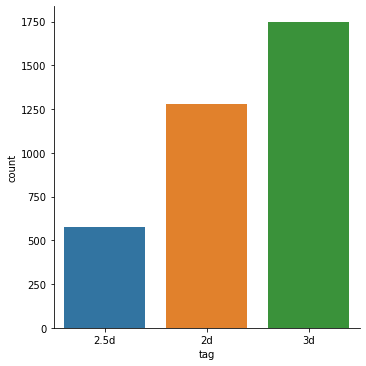

In [117]:
sns.catplot(data=animation_cat, x='tag', kind='count')

In [118]:
animation_tags_merged = pd.merge(
    
    animation_cat,
    steam_data_2019,
    on='appid',
    sort=True,
)

animation_sample = animation_tags_merged.sample(frac=1)
print(animation_sample.shape)


(154, 16)


([0, 1, 2], [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

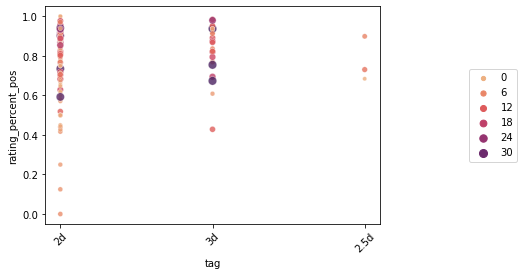

In [119]:
_ = sns.scatterplot(data=animation_sample, x='tag', y='rating_percent_pos', hue='price', size='price', palette='flare', alpha=.8)
_.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.xticks(rotation=45)

Here we can see that 3d has highter rates of postive reviews than 2d as well as having higher prices

$ii.$ Genre

In [120]:
genre.append('appid')
genre_tag = tags_tf.filter(items=genre)

genre_cat = (genre_tag.melt(id_vars='appid', var_name='tag')
       .query('value== 1')
       .drop('value',1))
genre_cat

,appid,tag
0,10,action
1,20,action
3,40,action
4,50,action
5,60,action
...,...,...
1596169,1057690,rpg
1596174,1058430,rpg
1596176,1058660,rpg
1596195,1062240,rpg


In [121]:
genre_cat['tag'].value_counts().sort_values(ascending=False).head(10)

indie         17937
action        11029
adventure      9212
strategy       5168
simulation     4925
rpg            4197
puzzle          885
horror          875
platformer      839
survival        832
Name: tag, dtype: int64

Our list of genres is too large, so we're going to pick the top 10 to use in analysis:

indie, action, adventure, strategy, simulation, puzzle, horror, platformer, survival, education

In [122]:
top_10_genre = ['indie', 'action', 'adventure', 'strategy', 'simulation', 'rpg', 'puzzle', 'horror', 'platformer', 'survival', 'education']
genre_cat = genre_cat[genre_cat['tag'].isin(top_10_genre)]
genre_cat

,appid,tag
0,10,action
1,20,action
3,40,action
4,50,action
5,60,action
...,...,...
1596169,1057690,rpg
1596174,1058430,rpg
1596176,1058660,rpg
1596195,1062240,rpg


In [123]:
genre_tags_merged = pd.merge(
    
    genre_cat,
    steam_data_2019,
    on='appid',
    sort=True,
)

genre_sample = genre_tags_merged.sample(frac=.05)
print(genre_sample.shape)

(2445, 16)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

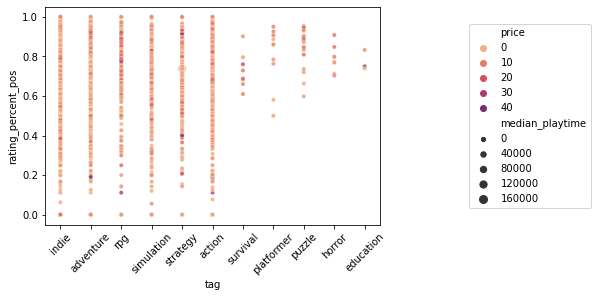

In [124]:
_ = sns.scatterplot(data=genre_sample, x='tag', y='rating_percent_pos', hue='price', size='median_playtime', palette='flare', alpha=.8)
_.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.xticks(rotation=45)

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.,
        4000., 4500.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

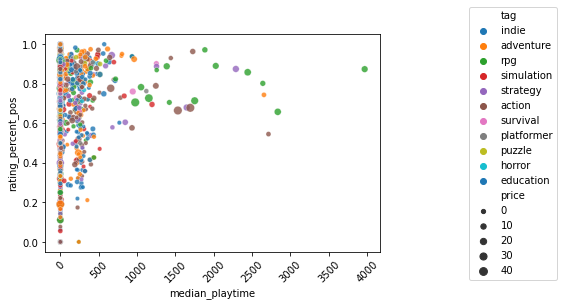

In [125]:
_ = sns.scatterplot(data=genre_sample[genre_sample['median_playtime']<4000], x='median_playtime', y='rating_percent_pos', hue='tag', size='price', palette='tab10', alpha=.8)
_.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.xticks(rotation=45)

We can determine form this that horror, survival, education, puzzle, and platformers are less volitile in their reviews, and players may be more willing to pay more for something in the horror and survival genres. 

We also see survival having longer play times, this makes sense as they wouldn't be as interesting if they are shorter games, the purpose of the game is to survive for as long as possible.

$iii.$ Art Style

In [126]:
art_style.append('appid')
art_tag = tags_tf.filter(items=art_style)

art_cat = (art_tag.melt(id_vars='appid', var_name='tag')
       .query('value== 1')
       .drop('value',1))

art_cat['tag'].value_counts().sort_values(ascending=False).head(10)



gore              1378
anime              941
visual_novel       934
pixel_graphics     756
retro              640
colorful           619
cute               617
realistic          591
stylized           590
fmv                590
Name: tag, dtype: int64

In [127]:
top_10_art = ['gore', 'anime', 'visual_novel', 'pixel_graphics', 'retro', 'colorful', 'cute', 'realistic', 'stylized', 'fmv']
art_cat = art_cat[art_cat['tag'].isin(top_10_art)]
art_tags_merged = pd.merge(
    
    art_cat,
    steam_data_2019,
    on='appid',
    sort=True,
)

art_sample = art_tags_merged.sample(frac=.05)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

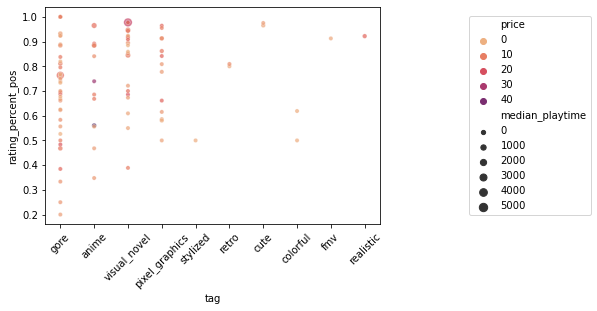

In [128]:
_ = sns.scatterplot(data=art_sample, x='tag', y='rating_percent_pos', hue='price', size='median_playtime', palette='flare', alpha=.7)
_.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.xticks(rotation=45)

(array([-1000.,     0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

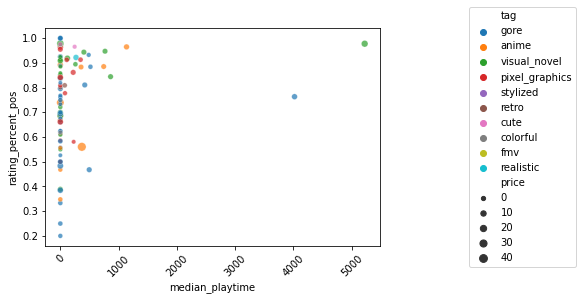

In [129]:
_ = sns.scatterplot(data=art_sample, x='median_playtime', y='rating_percent_pos', hue='tag', size='price', palette='tab10', alpha=.7)
_.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.xticks(rotation=45)

The 'gore' art style seems to have the most volitile ratings. We also see a higher price point for anime and realistic art styles, likely because of the level of production that goes into the game.

$iv.$ Features: Multiplayer and Feature lists

In [130]:
features = feature + multiplayer
features.append('appid')
features_tag = tags_tf.filter(items=features)

features_cat = (features_tag.melt(id_vars='appid', var_name='tag')
       .query('value== 1')
       .drop('value',1))

features_cat.loc[features_cat['tag'].isin(multiplayer), 'tag'] = 'multiplayer'
features_cat['tag'].value_counts()

multiplayer                6154
vr                          782
female_protagonist          723
great_soundtrack            712
story_rich                  697
character_customization     592
multiple_endings            581
split_screen                580
romance                     580
bullet_time                 578
grid_based_movement         578
6dof                        577
lore_rich                   577
moddable                    577
capitalism                  577
gun_customization           576
mod                         575
tutorial                    575
vr_only                     575
Name: tag, dtype: int64

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

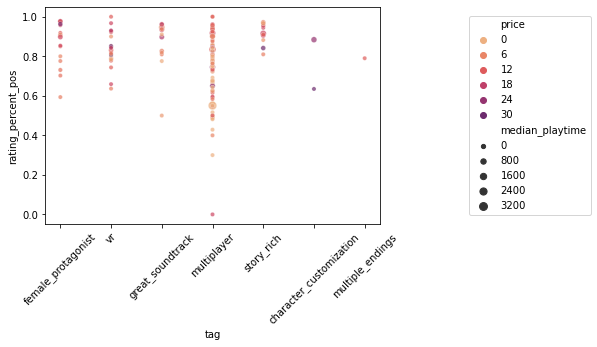

In [131]:
top_10_features = ['multiplayer', 'vr', 'female_protagonist', 'great_soundtrack', 'story_rich', 'character_customization', 
                   'multiple_endings', 'romance', 'split_screen', 'bullet_time']

features_cat = features_cat[features_cat['tag'].isin(top_10_features)]
features_tags_merged = pd.merge(
    
    features_cat,
    steam_data_2019,
    on='appid',
    sort=True,
)

features_sample = features_tags_merged[features_tags_merged['median_playtime'] < 4000].sample(frac=.1)

_ = sns.scatterplot(data=features_sample, x='tag', y='rating_percent_pos', hue='price', size='median_playtime', palette='flare', alpha=.7)
_.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.xticks(rotation=45)

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.,
        4000., 4500.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

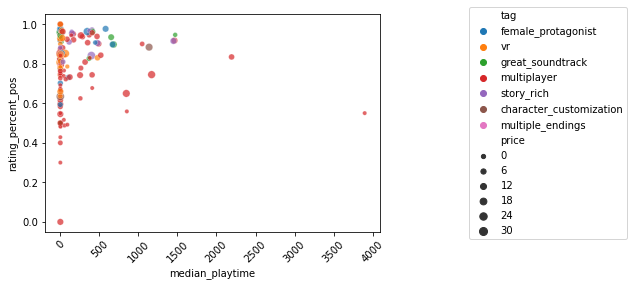

In [132]:
_ = sns.scatterplot(data=features_sample, x='median_playtime', y='rating_percent_pos', hue='tag', size='price', palette='tab10', alpha=.7)
_.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.xticks(rotation=45)

It looks as if games that are story rich and have a great soundtrack tend towards higher ratings. Multiplayer seems to be very volitile in ratings, but we could look deeper into the multiplayer category to see if there is a corrilation in multiplayer style and rating.

$v.$ Play Style

In [133]:
playstyle.append('appid')
playstyle_tag = tags_tf.filter(items=playstyle)

playstyle_cat = (playstyle_tag.melt(id_vars='appid', var_name='tag')
       .query('value== 1')
       .drop('value',1))


playstyle_cat['tag'].value_counts().sort_values(ascending=False).head(10)

strategy         5168
puzzle            885
platformer        839
survival          832
open_world        796
point_&_click     724
tower_defense     681
shoot_em_up       674
hidden_object     653
card_game         653
Name: tag, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

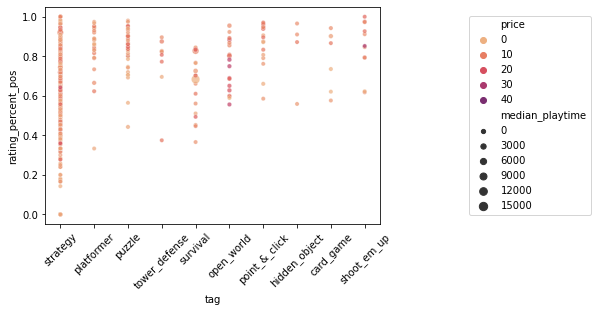

In [134]:
top_10_playstyles = ['strategy', 'puzzle', 'platformer', 'survival', 'open_world', 'point_&_click', 'tower_defense', 
                     'shoot_em_up', 'card_game', 'hidden_object']
playstyle_cat = playstyle_cat[playstyle_cat['tag'].isin(top_10_playstyles)]
playstyle_tags_merged = pd.merge(
    
    playstyle_cat,
    steam_data_2019,
    on='appid',
    sort=True,
)

playstyle_sample = playstyle_tags_merged.sample(frac=.1)
_ = sns.scatterplot(data=playstyle_sample, x='tag', y='rating_percent_pos', hue='price', size='median_playtime', palette='flare', alpha=.7)
_.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.xticks(rotation=45)

(array([-2000.,     0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.,
        14000., 16000., 18000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

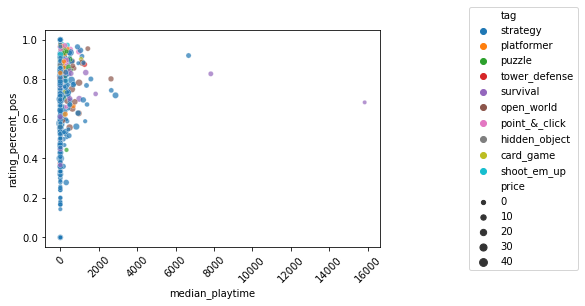

In [135]:
_ = sns.scatterplot(data=playstyle_sample, x='median_playtime', y='rating_percent_pos', hue='tag', size='price', palette='tab10', alpha=.7)
_.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.xticks(rotation=45)

The category that stands out in playstyle is the open world, with a generally high rating, longer playtimes, and higher price points. This could be because the player can freely explore the world that's been built, but this is also harder on graphics and game design as it requires more of the world to be built, thus costing more.

Strategy games seem to be fairly volitile with longer strategy games having higher favor.

$vi.$ Difficulty

In [136]:
difficulty.append('appid')

([0, 1, 2], [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

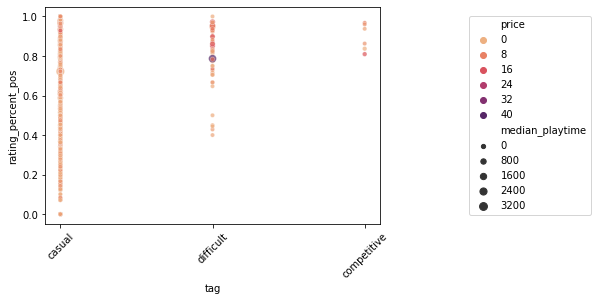

In [137]:

difficulty_tag = tags_tf.filter(items=difficulty)

difficulty_cat = (difficulty_tag.melt(id_vars='appid', var_name='tag')
       .query('value== 1')
       .drop('value',1))


difficulty_tags_merged = pd.merge(
    
    difficulty_cat,
    steam_data_2019,
    on='appid',
    sort=True,
)

difficulty_sample = difficulty_tags_merged[difficulty_tags_merged['median_playtime'] < 4000].sample(frac=.5)

_ = sns.scatterplot(data=difficulty_sample, x='tag', y='rating_percent_pos', hue='price', size='median_playtime', palette='flare', alpha=.7)
_.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.xticks(rotation=45)

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.,
        4000., 4500.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

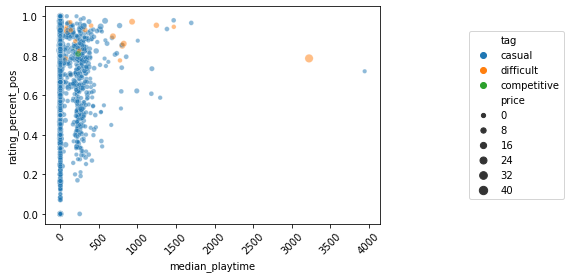

In [138]:
_ = sns.scatterplot(data=difficulty_sample, x='median_playtime', y='rating_percent_pos', hue='tag', size='price', palette='tab10', alpha=.5)
_.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.xticks(rotation=45)

Ratings for Difficult game tend to be faily positive, have longer play times, and look like players are willing to pay more for them. It makes sense that the competitve games do not see large game times as it is difficult to coordinate multiple people to compete against eachother for long periods of time.

$vii.$ Point of View (PoV)

In [139]:
pov

['first_person',
 'isometric',
 'side_scroller',
 'third_person',
 'third_person_shooter',
 'top_down',
 'top_down_shooter']

In [140]:
pov.append('appid')

pov_tag = tags_tf.filter(items=pov)

pov_cat = (pov_tag.melt(id_vars='appid', var_name='tag')
       .query('value== 1')
       .drop('value',1))

pov_cat.tag = pov_cat.tag.str.replace(r'third_person.*', 'third_person')
pov_cat.tag = pov_cat.tag.str.replace(r'top_down.*', 'top_down')
pov_cat['tag'].value_counts()

<ipython-input-140-0c69df79d6fa>:9: FutureWarning: The default value of regex will change from True to False in a future version.
  pov_cat.tag = pov_cat.tag.str.replace(r'third_person.*', 'third_person')
<ipython-input-140-0c69df79d6fa>:10: FutureWarning: The default value of regex will change from True to False in a future version.
  pov_cat.tag = pov_cat.tag.str.replace(r'top_down.*', 'top_down')


top_down         1179
third_person     1170
first_person      620
side_scroller     601
isometric         584
Name: tag, dtype: int64

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

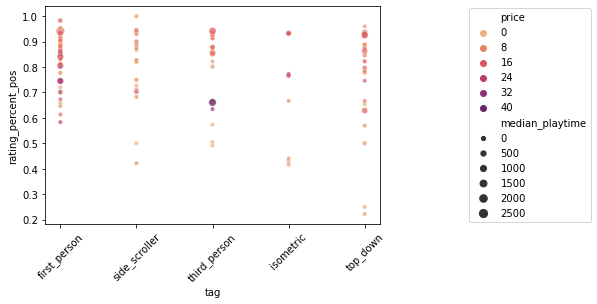

In [141]:
pov_tags_merged = pd.merge(
    
    pov_cat,
    steam_data_2019,
    on='appid',
    sort=True,
)

pov_sample = pov_tags_merged.sample(frac=1)
_ = sns.scatterplot(data=pov_sample, x='tag', y='rating_percent_pos', hue='price', size='median_playtime', palette='flare', alpha=.7)
_.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.xticks(rotation=45)

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500., 3000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

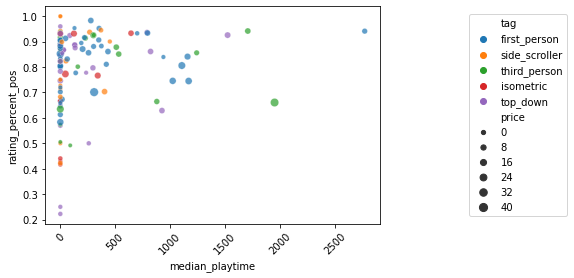

In [142]:
_ = sns.scatterplot(data=pov_sample, x='median_playtime', y='rating_percent_pos', hue='tag', size='price', palette='tab10', alpha=.7)
_.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.xticks(rotation=45)

It looks like isometric is not popular for longer games, and first or third person points of view have more popular ratings than top down.

$viii.$ Setting

In [143]:
setting.append('appid')

setting_tag = tags_tf.filter(items=setting)

setting_cat = (setting_tag.melt(id_vars='appid', var_name='tag')
       .query('value== 1')
       .drop('value',1))

setting_cat['tag'].value_counts().sort_values(ascending=False).head(10)

world_war_ii        631
cyberpunk           619
post_apocalyptic    613
warhammer_40k       602
fantasy             596
war                 595
star_wars           593
western             593
historical          588
futuristic          581
Name: tag, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

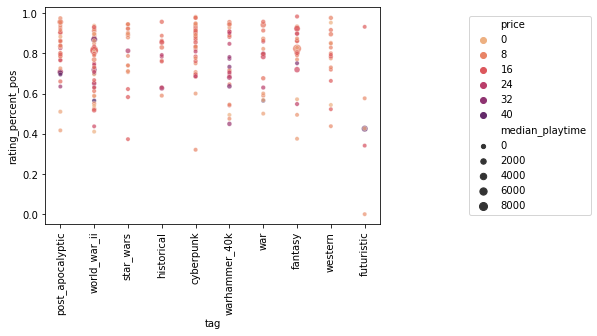

In [144]:
top_10_settings = ['world_war_ii', 'post_apocalyptic', 'warhammer_40k', 'war', 'star_wars', 'western', 'historical', 
                   'futuristic', 'cyberpunk', 'fantasy']

setting_cat = setting_cat[setting_cat['tag'].isin(top_10_settings)]
setting_tags_merged = pd.merge(
    
    setting_cat,
    steam_data_2019,
    on='appid',
    sort=True,
)

setting_sample =setting_tags_merged.sample(frac=1)
_ = sns.scatterplot(data=setting_sample, x='tag', y='rating_percent_pos', hue='price', size='median_playtime', palette='flare', alpha=.7)
_.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.xticks(rotation=90)

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.,
        4000., 4500.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

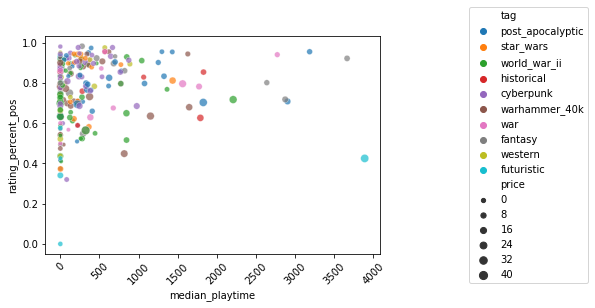

In [145]:
_ = sns.scatterplot(data=setting_sample[setting_sample['median_playtime'] < 4000], x='median_playtime', y='rating_percent_pos', hue='tag', size='price', palette='tab10', alpha=.7)
_.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.xticks(rotation=45)

Our most commmon settings are world_war_ii, cyberpunk, and post_apocalyptic.
We see high ratings for fantasy, cyberpunk, war, star_wars, and historical settings.
And low ratings on Futuristic.
And we see high playtimes for fantasy and world war 2. Then for under 4000 minutes we have postapocalyptic, warhammer_40k, and war settings added to our list of longer games with higher ratings.

## Conclusion:

The favored categories of each set are at the top of the notebook. Note in the subsections of part V, the lists were manually created so we can go through and edit them as we see fit, or even create new ones if we want a more in depth search of a certain category, such as multiplayer or sports.

There is a lot to work with from these data sets. I decided the last set was too large to work with all at once so decided to take the tags data and filter for what I wanted to look at each time and then merged the filtered data with the game data to create the tables. It was good to see a consistancy between all of the data sets, that longer games tended to have higher ratings. This trend tends to start around the 1000 minutes mark. I think we have enough information here for a game designer to have options to choose how they design a game from this point.